#### 모듈

In [1]:
# file
import os
import os.path as path

# data
import pandas as pd
import numpy as np
import math

# encoder
from sklearn.preprocessing import LabelEncoder

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# magic functions
from IPython.core.magic import register_cell_magic

#### 매직 함수 (편의성 함수)

In [2]:
@register_cell_magic
def skip(line, cell):
    return

#### 인코더 불러오기

In [3]:
# path
BasePath = "./encoders"

# get list of encoder files
encoder_file_list = os.listdir(BasePath)

# print list of encoder files
print(encoder_file_list)

# load encoder files
encoder_dict = {}

for file in encoder_file_list:
    encoder_name = file.replace(".npy", "")
    encoder_dict[encoder_name] = LabelEncoder()
    classes = np.load(path.join(BasePath, file), allow_pickle=True)
    encoder_dict[encoder_name].classes_ = np.load(path.join(BasePath, file), allow_pickle=True)
    
    if encoder_name == "os_version":
        encoder_dict[encoder_name].fit(list(map(lambda x: str(x), classes)))

# encoder modify
for encoder_name in encoder_dict.keys():
    # reorder encoder : make encoder[0] = nan
    encoder_dict[encoder_name].classes_ = \
        np.append(encoder_dict[encoder_name].classes_[-1],\
                    encoder_dict[encoder_name].classes_[:-1])

    print(f"\n{encoder_name} : {(encoder_dict[encoder_name].classes_.shape[0]) - 1} 가지\n{encoder_dict[encoder_name].classes_[1:6]}")

# reorder 'event_type' encoder classes
data_set_names = [
    'error',
    'enter.main_page',
    'enter.signup_page',
    'complete.signup',
    'enter.content_page',
    'click.content_page_start_content_button',
    'click.content_page_more_review_button',
    'enter.payment_page',
    'complete.subscription',
    'renew.subscription',
    'resubscribe.subscription',
    'start.free_trial',
    'start.content',
    'enter.lesson_page',
    'complete.lesson',
    'click.lesson_page_related_question_box',
    'end.content',
    'click.cancel_plan_button'
]

encoder_dict['event_type'].classes_ = np.array(data_set_names)


['button.name.npy', 'button_name.npy', 'city.npy', 'content.difficulty.npy', 'content.id.npy', 'country.npy', 'coupon.discount_amount.npy', 'device_family.npy', 'device_type.npy', 'event_type.npy', 'is_free_trial.npy', 'is_trial.npy', 'language.npy', 'lesson.id.npy', 'os_name.npy', 'os_version.npy', 'paid_amount.npy', 'pg.type.npy', 'plan.price.npy', 'plan.type.npy', 'platform.npy', 'question.id.npy', 'trial.type.npy', 'type.npy', 'user_id.npy']

button.name : 9 가지
['구독 시작하기' '무료로 들어보기' '무료로 시작하기' '최저가 혜택 받기' '최저가로 시작하기']

button_name : 5 가지
['무료로 시작하기' '수강시작' '수강하기' '이어하기' None]

city : 4340 가지
["'Ewa Beach" '6th of October City' 'A Coruña' 'A Me' 'AElmhult']

content.difficulty : 5 가지
['advanced' 'beginner' 'hard' 'intermediate' None]

content.id : 212 가지
['011a040b817225cb7c01d4676c21ea44' '01d9424fd9d2b1d7a4392042fc646061'
 '035f018008f1696ded6e10e1dd757726' '03b4a290c08f7fa83933827a994f2e61'
 '040ccaa97a52e006a2c94bb7c5dce263']

country : 189 가지
['Afghanistan' 'Albania' 'Algeria' 

#### 인코더 테스트  << skipping >>

In [4]:
%%skip  # << skipping >>

## 주의사항
# 1. BaseFilePath에 데이터 파일 경로를 설정해주세요.
# 2. 제외하고 싶은 컬럼이 있으면 exclude_columns에 추가해주세요.
# 3. 인코딩을 하고 컬럼 이름을 바꿔 주세요.

## 함수 설명
# .transform()을 이용해서 데이터를 변환해주세요.
# .inverse_transform()을 이용해서 데이터를 역변환해주세요.


## 인코딩

# 개인적으로 BaseFilePath를 설정해주었는데, 이를 이용해서 파일 리스트를 불러오는 코드입니다.
BaseFilePath = 'd:\Codeit\intermediate_project\주제 2. 구독서비스 프로덕트 데이터 분석'
filelist = os.listdir(BaseFilePath)[:-1]

# 제외 컬럼
exclude_columns = ['device_carrier', 'os_version']

# 제외 컬럼 : 제외하고 싶은 컬럼을 추가합니다.
exclude_columns_plus = []


# display file list
print(filelist)

# load data
dfs = []

for file in filelist:
    if file.endswith('.csv'):
        df = pd.read_csv(path.join(BaseFilePath, file), nrows=1000)
        
        # preprocess
        # convert os_version to string
        df['os_version'] = df['os_version'].astype(str)
        # drop 
        df = df.drop('device_carrier', axis=1)
        df = df.drop('os_version', axis=1)
        # convert client_event_time to datetime
        df['client_event_time'] = pd.to_datetime(df['client_event_time'])
        
        dfs.append(df)
        print(f"file: {file}, shape: {df.shape}")

for i, df in enumerate(dfs):
    print(f"file: {filelist[i]} encodings - ")
    
    # encode categorical columns using the loaded encoders
    for col in df.columns:
        # exception handling
        if col not in encoder_dict:
            continue
        if col in exclude_columns + exclude_columns_plus:
            continue
        
        # encode using the loaded encoder
        df[col] = encoder_dict[col].transform(df[col])
        print(f"{col}: {encoder_dict[col].classes_[:5]}")
    
    # display result head
    display(df.head())

In [5]:
%%skip  # << skipping >>

## 디코딩

for i, df in enumerate(dfs):
    print(f"file: {filelist[i]} decodings - ")
    
    # encode categorical columns using the loaded encoders
    for col in df.columns:
        # exception handling
        if col not in encoder_dict:
            continue
        if col in exclude_columns + exclude_columns_plus:
            continue
        
        # encode using the loaded encoder
        df[col] = encoder_dict[col].inverse_transform(df[col])
        print(f"{col}: {encoder_dict[col].classes_[:5]}")
    
    # display result head
    display(df.head())

#### 함수 정의

In [6]:
def read_sample(path, samplesize=4000000):
    '''
    #### 데이터를 불러오되 일정 크기 이상이면 샘플로 추출하여 크기를 줄입니다. \n
     \n
    path : 파일 경로입니다. \n
    samplesize : 추출할 샘플의 크기입니다.(default: 4000000), 0 이라면 하지 않습니다. \n
     \n
    return : 데이터프레임을 반환합니다. \n
     \n
    chunksize(=2000000)로 불러와서 samplesize를 넘으면 샘플링하고 중복을 제거합니다. \n
    '''
    
    # set df
    df = []
    
    # read
    temp = pd.read_csv(path, chunksize=2000000)
    
    # append and union
    for chunk in temp:
        df.append(chunk)
    
    # check df length
    if len(df) == 1:
        df = df[0]
    else:
        df = pd.concat(df, ignore_index=True)
    
    # sample and drop duplicates
    if (samplesize != 0) and (df.shape[0] > samplesize):
        df = df.sample(samplesize, replace=True)
        df.drop_duplicates(inplace=True)
        df.reset_index(drop=True, inplace=True) 
        
    return df

#### 파일 탐색  << skipping >>

In [7]:
%%skip  # << skipping >>

BaseFilePath = 'd:\Codeit\intermediate_project'
filelist = os.listdir(BaseFilePath)

# filter filename
dirname = [f for f in filelist if not f.endswith('.zip')][1]
print(dirname)

#### 로드 데이터  << skipping >>

In [8]:
%%skip  # << skipping >>

# set
DF = []
dfs = []
common_cols = []
all_cols = []
core_cols = ['user_id', 'event_type', 'client_event_time']

# get filelist
filelist = os.listdir(path.join(BaseFilePath, dirname))

# read csv files and check common columns
for filename in filelist:
    # csv
    if filename.endswith('.csv'):
        print('csv file found')
    
        # read csv
        df = read_sample(path.join(BaseFilePath, dirname, filename))

        # if common columns are not set, set it            
        if common_cols == [] and list(df.columns):
            common_cols = list(df.columns)
        
        # if common columns are set, check common columns
        common_cols = list(set(common_cols).intersection(set(df.columns)))
        all_cols = list(set(all_cols).union(set(df.columns)))

        ## preprocessing
        # drop device_carrier
        df = df.drop('device_carrier', axis=1)
        # convert client_event_time to datetime
        df['client_event_time'] = pd.to_datetime(df['client_event_time'])
        # convert os_version to string
        df['os_version'] = df['os_version'].astype(str)
        # # before update, fillna with '0'
        # df.fillna({'country' : '0', 'city' : '0', 'device_type' : '0', 'device_family' : '0'}, inplace=True)
        
        # update
        dfs.append(df)

    # if not csv, just pass    
    else:
        print('other file found')
        print(filename)

print(common_cols)

#### 데이터 통합  << skipping >>

In [9]:
%%skip  # << skipping >>

# reset DF
if len(DF) > 0:
    DF = []

# concat dfs
DF = pd.concat(dfs[:9] + dfs[10:], axis=0).reset_index(drop=True)
print(DF.shape[0])

## preprocessing
# drop os_version
DF = DF.drop('os_version', axis=1)

# encode categorical columns using the loaded encoders
for col in DF.columns:
    # exception handling
    if col in ['client_event_time', 'device_carrier']:
        continue
    
    print(f"\n\n{col}")
    
    # encode using the loaded encoder
    DF[col] = encoder_dict[col].transform(DF[col])
    
    # display
    display(DF[col].value_counts())

# display result head   
DF

In [10]:
%%skip  # << skipping >>

com_DF = DF[core_cols].copy() # copy core_cols

print(com_DF.info())
DF.info()

In [11]:
%%skip  # << skipping >>

big_df = pd.read_csv(path.join(BaseFilePath, dirname, filelist[9]), chunksize=2000000)
enc_chunks = []

for i, chunk in enumerate(big_df):
    # preprocessing
    chunk = chunk.drop('device_carrier', axis=1)
    chunk = chunk.drop('os_version', axis=1)
    chunk['client_event_time'] = pd.to_datetime(chunk['client_event_time'])
    
    # display
    print(f"\n\n{i}")
    print(chunk.info())
    
    # encoding
    for col in chunk.columns:
        # exception handling
        if col in ['client_event_time', 'device_carrier']:
            continue
        
        # label encoding
        chunk[col] = encoder_dict[col].transform(chunk[col])
        
    enc_chunks.append(chunk)
    
big_df = pd.concat(enc_chunks, axis=0)

In [12]:
%%skip  # << skipping >>

print(big_df.info())
big_df.head()

#### 인코딩 데이터 저장  << skipping >>

In [13]:
%%skip  # << skipping >>

# save the big_df
big_df.to_csv('total_lesson.csv', index=False)
print('done - save total_lesson.csv')

# save the DF
DF.to_csv('total.csv', index=False)
print('done - save total.csv')

#### ================================

#### 변수 선언

In [14]:
core_col = ['client_event_time', 'user_id', 'event_type']

#### 함수 정의

In [69]:
def check_too_close_log(df, offset = 1):
    '''
    #### offset 이내의 로그들을 출력하고 로그의 인덱스를 반환합니다. \n
     \n
    df : 분석할 데이터입니다. \n
    offset : 근접 로그의 측정하는 기준입니다. 단위는 초입니다. 이 값 이하의 시간차이를 가진 로그를 근접로그라고 합니다. \n
     \n
    return : 근접로그의 인덱스. \n
    '''

    ## error handling
    
    # check 'user_id' column
    if 'user_id' not in df.columns:
        print("'user_id' column not found")
        return
    
    # check 'client_event_time' column
    if 'client_event_time' not in df.columns:
        print("'client_event_time' column not found")
        return
    
    # if 'client_event_time' is str, convert to datetime
    if type(df['client_event_time']) == str:    
        df['client_event_time'] = pd.to_datetime(df['client_event_time'])


    ## main

    # drop duplicate
    temp = df.drop_duplicates().copy()
    print(f"drop duplicate : {df.shape[0] - temp.shape[0]} \\")
    df = temp.copy()
    
    # 'user_id' - max conut
    temp = df.groupby('user_id')['user_id'].count().sort_values(ascending=False)
    print(f"'user_id' - max conut : {temp} \\")

    # over 1
    df_len = df.shape[0]
    print(f"over 1 : {((temp > 1).sum() / df_len * 100).round(2)}% \\" )
    
    # 'user_id', 'client_event_time' - max conut
    temp = df.groupby(['user_id', 'client_event_time'])['client_event_time']\
        .count()\
        .sort_values(ascending=False)
    print(f"'user_id', 'client_event_time' - max conut : {temp.max()} \\\n")
    
    if temp.max() > 1:
        mask = df.duplicated(subset=['user_id', 'client_event_time'], keep=False)
        print(f"('user_id', 'client_event_time') duplicated_cnt : {mask.sum()}")
        display(df[mask].sort_values(['user_id', 'client_event_time']).head(10))
    
    # too_close_log check
    temp = df.sort_values(['user_id', 'client_event_time'])\
            .groupby(['user_id'])['client_event_time']\
            .diff().dt.total_seconds()
    temp = temp.dropna()
    
    # display
    print(temp.head(3))
    print(temp.tail(3), '\n\n')
    
    # display too close log
    if (temp < offset).sum() > (temp == 0).sum():
        # count
        cnt = (temp < offset).sum() - (temp == 0).sum()
        # too close log rate
        print(f"too close log : {cnt}, {(cnt / df_len * 100).round(2)}%")
        # display sample
        result = temp[((temp < offset) & (~(temp == 0)))]
        display(result)
        
    
    return result.index

In [16]:
def concat_enc_df_int32(df1, df2):
    
    # make common columns in both dfs
    for col in df1:
        if col in df2.columns:
            continue    
        df2.loc[:, col] = 0

    for col in df2:
        if col in df1.columns:
            continue
        df1.loc[:, col] = 0

    # concat
    result = pd.concat([df1, df2], axis=0)\
                .sort_values('client_event_time')\
                .reset_index(drop=True)

    # set convert dict
    convert_dict = {col : 'int16' for col in result.columns}
    convert_dict['client_event_time'] = 'datetime64[ns]'
    convert_dict['user_id'] = 'int32'

    # convert
    result = result.astype(convert_dict)
    
    return result

In [17]:
def get_combinations(li):
    # exception handling
    if len(li) == 0:
        return []
    if len(li) == 1:
        return li
    if len(li) == 2:
        if len(set(li)) == 1:
            return [li[0]]
        return sorted(li)
    
    # set variables
    combinations = []
    act = li[0]
    only_act = 0
    
    # get combinations
    for i in li[1:]:
        next_act = i
        
        if next_act == act:
            only_act = act
            continue
        
        item = sorted([act, next_act])
        if item not in combinations:
            combinations.append(item)
            combinations = sorted(combinations)
        
        act = next_act
    
    # exception handling
    if len(combinations) == 1:
        return combinations[0]

    if len(combinations) == 0:
        return [only_act]
    
    return combinations

In [18]:
def get_set(li):
    if len(li) == 0:
        return set()
    if len(li) == 1:
        return set([int(li[0])])
    if len(li) == 2:
        if len(set(li)) == 1:
            return set([int(li[0])])
        return set([int(li[0]), int(li[1])])
    
    combinations = set()
    act = int(li[0])
    
    # get combinations
    for i in li[1:]:
        next_act = int(i)
        
        combinations.add(act)
        
        act = next_act
    
    return combinations

In [19]:
def display_cnt_rate(cnt):
    # additional information
    rate = cnt / cnt.sum() * 100
    rate_cum = rate.cumsum()

    # display
    print(f'sample_cnt : {cnt.sum()}')
    result = pd.concat([cnt, rate, rate_cum], axis = 1)
    result.columns = ['cnt', 'rate', 'rate_cum']
    display(result.head(30).round(2))
    
    return result

In [20]:
## 이벤트 타입을 사용자 정의 함수로 agg하고 결과를 보여주는 함수
def event_type_agg(df, func):
    # apply user defined function to aggregate event_type
    result = df\
        .sort_values(['user_id', 'client_event_time'])\
        .groupby(['user_id'])['event_type']\
        .agg(lambda x: func(x.values))\
        .value_counts()
        
    # display
    display_cnt_rate(result)

In [21]:
def valcnt_with_daterange(df, cols):
    if 'client_event_time' not in cols:
        cols.append('client_event_time')
        print("cautious: client_event_time is not in cols, added to cols")
    
    target_df = df[cols]
    target_cols = [col for col in cols if col != 'client_event_time']

    for col in target_df.columns:
        if col == 'client_event_time':
            continue
        
        temp_le = encoder_dict[col]
        temp_le.classes_[0] = 'NaN'
        
        target_df[col] = encoder_dict[col].inverse_transform(target_df[col])

    result = target_df[target_cols].value_counts()
    temp = target_df.groupby(target_cols)['client_event_time']
    result = pd.concat([result, temp.min().dt.date, temp.max().dt.date], axis=1)

    result.columns = ['count', 'min_date', 'max_date']
    result['dateRange'] = (result['max_date'] - result['min_date'])

    display(result)

In [22]:
def get_rate_in_columns(df, col="", head_len = 10, df_name = ""):
    if col == "":
        result = df.value_counts()
    else:
        result = df[col].value_counts()

    rate = result / result.sum() * 100
    rate_cum = rate.cumsum()

    # get result
    result = pd.concat([result, rate, rate_cum], axis = 1)
    result.index = encoder_dict[col].inverse_transform(result.index)
    
    # set column name
    result.columns = ['count', 'rate', 'rate_cumsum']
    
    if df_name == "":
        df_name = col
    
    # display
    print(f"{df_name} result : ")
    display(result.head(head_len).index)
    display(result.head(head_len))

In [23]:
def display_two_sets_relation(set_A, set_B):
    print(f"set_A : {len(set_A)}")
    print(f"set_B : {len(set_B)}")
    
    print(f"set_B in set_A : {len(set_B.intersection(set_A))}")
    print(f"set_B not in set_A : {len(set_B - set_A)}")
    print(f"set_A not in set_B : {len(set_A - set_B)}")

In [24]:
def get_user_rate(df, base_mask, condition_mask):
    base_user = df.loc[base_mask, 'user_id'].unique()
    condition_user = df.loc[(condition_mask), 'user_id'].unique()
    
    base_user = set(base_user)
    condition_user = set(condition_user)
    
    # exception handling
    if len(base_user) == 0 \
    or len(base_user) == 1:
        print("base_user is empty or has only one element")
        return list(), list()
    
    if len(condition_user) == 0 \
    or len(condition_user) == 1:
        print("condition_user is empty or has only one element")
        return list(), list()
    
    # display the condition
    display_two_sets_relation(base_user, condition_user)
    print(f"condition_user rate : {round(len(condition_user.intersection(base_user)) / (len(base_user) + 1) * 100, 2)}%")
    
    return list(base_user), list(condition_user)

In [25]:
def groupby_user_agg_muli_column(df, aggfunc, additional_cols = []):
    # error handling
    if 'user_id' not in df.columns:
        print("'user_id' column not found")
        return
    if 'client_event_time' not in df.columns:
        print("'client_event_time' column not found")
        return
    if 'event_type' not in df.columns:
        print("'event_type' column not found")
        return
    
    # additional columns error handling
    for col in additional_cols:
        if col not in df.columns:
            print(f"'{col}' column not found")
            return
    
    # sorting
    df = df.sort_values(['user_id', 'client_event_time'], ascending=True)
    
    # filtering
    temp_df = df[['user_id', 'client_event_time', 'event_type'] + additional_cols].copy()
    
    # make total column
    temp_df['total'] = temp_df['client_event_time']
    temp_df['total'] = temp_df['total'].astype(str)
    for col in temp_df.columns[2:]:
        temp_df['total'] = temp_df['total'] + ' ' + temp_df[col].astype(str)

    # groupby user_id
    result = temp_df.groupby('user_id')['total']\
        .aggregate(lambda x: aggfunc([ item.split() for item in str(x).split('\n')[:-1] ]))
    
    # 
    return result

#### 옵션 설정

In [26]:
pd.set_option('mode.chained_assignment', None)

#### 인코딩 데이터 불러오기

In [27]:
big_df = pd.read_csv('total_lesson.csv')
print('done - load total_lesson.csv')

DF = pd.read_csv('total.csv')
print('done - load total.csv')

done - load total_lesson.csv
done - load total.csv


#### 칼럼 변환

In [28]:
# set time columns
time_cols = ['client_event_time']

# set convert dict
convert_dict1 = {col : 'int16' for col in big_df.columns}
convert_dict1['client_event_time'] = 'datetime64[ns]'
convert_dict1['user_id'] = 'int32'

convert_dict2 = {col : 'int16' for col in DF.columns}
convert_dict2['client_event_time'] = 'datetime64[ns]'
convert_dict2['user_id'] = 'int32'

# convert
big_df = big_df.astype(convert_dict1)
DF = DF.astype(convert_dict2)

# display
display(big_df.info())
display(DF.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21029707 entries, 0 to 21029706
Data columns (total 14 columns):
 #   Column             Dtype         
---  ------             -----         
 0   city               int16         
 1   client_event_time  datetime64[ns]
 2   country            int16         
 3   device_family      int16         
 4   device_type        int16         
 5   event_type         int16         
 6   language           int16         
 7   os_name            int16         
 8   platform           int16         
 9   user_id            int32         
 10  content.id         int16         
 11  is_trial           int16         
 12  lesson.id          int16         
 13  is_free_trial      int16         
dtypes: datetime64[ns](1), int16(12), int32(1)
memory usage: 722.0 MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330946 entries, 0 to 12330945
Data columns (total 23 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   city                    int16         
 1   client_event_time       datetime64[ns]
 2   country                 int16         
 3   device_family           int16         
 4   device_type             int16         
 5   event_type              int16         
 6   language                int16         
 7   os_name                 int16         
 8   platform                int16         
 9   user_id                 int32         
 10  content.id              int16         
 11  button.name             int16         
 12  button_name             int16         
 13  question.id             int16         
 14  lesson.id               int16         
 15  type                    int16         
 16  plan.price              int16         
 17  paid_amount             int16         
 18  

None

#### 데이터 분할

In [29]:
# separate 2022 / 2023
enter_lesson_2022 = big_df[big_df['client_event_time'].dt.year == 2022]
print(enter_lesson_2022.shape[0])
enter_lesson_2023 = big_df[big_df['client_event_time'].dt.year == 2023]
print(enter_lesson_2023.shape[0])

DF_2022 = DF[DF['client_event_time'].dt.year == 2022]
print(DF_2022.shape[0])
DF_2023 = DF[DF['client_event_time'].dt.year == 2023]
print(DF_2023.shape[0])

7373559
13655574
5978077
6352482


#### 각 연도 묶음

In [30]:
df_2022 = concat_enc_df_int32(DF_2022, enter_lesson_2022)
display(df_2022.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13351636 entries, 0 to 13351635
Data columns (total 25 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   city                    int16         
 1   client_event_time       datetime64[ns]
 2   country                 int16         
 3   device_family           int16         
 4   device_type             int16         
 5   event_type              int16         
 6   language                int16         
 7   os_name                 int16         
 8   platform                int16         
 9   user_id                 int32         
 10  content.id              int16         
 11  button.name             int16         
 12  button_name             int16         
 13  question.id             int16         
 14  lesson.id               int16         
 15  type                    int16         
 16  plan.price              int16         
 17  paid_amount             int16         
 18  

None

In [31]:
df_2023 = concat_enc_df_int32(DF_2023, enter_lesson_2023)
display(df_2023.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20008056 entries, 0 to 20008055
Data columns (total 25 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   city                    int16         
 1   client_event_time       datetime64[ns]
 2   country                 int16         
 3   device_family           int16         
 4   device_type             int16         
 5   event_type              int16         
 6   language                int16         
 7   os_name                 int16         
 8   platform                int16         
 9   user_id                 int32         
 10  content.id              int16         
 11  button.name             int16         
 12  button_name             int16         
 13  question.id             int16         
 14  lesson.id               int16         
 15  type                    int16         
 16  plan.price              int16         
 17  paid_amount             int16         
 18  

None

In [32]:
MIN_DATE = df_2022['client_event_time'].min()
MAX_DATE = df_2023['client_event_time'].max()

print(f'MIN_DATE : {MIN_DATE}')
print(f'MAX_DATE : {MAX_DATE}')

MIN_DATE : 2022-01-01 00:00:01.181000
MAX_DATE : 2023-12-31 23:59:35.209000


In [33]:
def get_pay_duration(event_list):
    # define values
    start = 0
    end = 0
    sum = pd.Timedelta(0)
    
    # get pay duration
    for event in event_list:
        # start
        if (start == 0) and event[3] in ['8', '9', '10']:
            start = pd.to_datetime(event[1] + ' ' + event[2])
            end == 0
        # end
        if (end == 0) and (event[3] == '17'):
            end = pd.to_datetime(event[1] + ' ' + event[2])

        # sum duration        
        if (start != 0) and (end != 0):
            sum = sum + (end - start)
            # reset
            start = 0
            end = 0
    
    # exception handling
    if sum == pd.Timedelta(0) and end != 0:
        return (end - MIN_DATE)
    if sum == pd.Timedelta(0) and start != 0:
        return (MAX_DATE - start)

    # 
    return sum

In [34]:
def get_non_pay_duration(event_list):
    # define values
    start = 0
    end = 0
    sum = pd.Timedelta(0)
    
    before_price = 0
    price = 0
    
    # get non pay duration
    for event in event_list:
        # start
        if (end == 0) and event[3] in ['8', '9', '10']:
            end = pd.to_datetime(event[1] + ' ' + event[2])
            # update price
            before_price = price
            price = event[4]
        # end
        if (start == 0) and (event[3] == '17'):
            start = pd.to_datetime(event[1] + ' ' + event[2])
            # reset end
            end = 0
        
        # sum duration  
        if (start != 0) and (end != 0):
            sum = sum + (end - start)
            # reset
            start = 0
            end = 0

    return [sum, price, before_price]

### 분석

#### too close log

In [98]:
# target data
com_df_22 = df_2022[core_col]
com_df_23 = df_2023[core_col]
display(com_df_22)
display(com_df_23)


,client_event_time,user_id,event_type
0,2022-01-01 00:00:01.181,50675,14
1,2022-01-01 00:00:10.862,0,4
2,2022-01-01 00:01:16.636,0,2
3,2022-01-01 00:01:34.047,14684,13
4,2022-01-01 00:01:47.862,0,2
...,...,...,...
13351631,2022-12-31 23:59:40.486,692,13
13351632,2022-12-31 23:59:52.113,0,5
13351633,2022-12-31 23:59:52.290,0,2
13351634,2022-12-31 23:59:55.470,3732,13


,client_event_time,user_id,event_type
0,2023-01-01 00:00:02.833,40880,13
1,2023-01-01 00:00:02.975,173501,14
2,2023-01-01 00:00:03.391,173501,13
3,2023-01-01 00:00:04.900,0,1
4,2023-01-01 00:00:06.338,173501,13
...,...,...,...
20008051,2023-12-31 23:58:48.291,86601,13
20008052,2023-12-31 23:58:57.928,65802,14
20008053,2023-12-31 23:59:18.981,12167,4
20008054,2023-12-31 23:59:22.267,0,2


In [68]:
# too close log check in 2023
# only user_id != 0
close_indexs = check_too_close_log(com_df_23[com_df_23['user_id'] != 0], offset = 1)

drop duplicate : 732 \
'user_id' - max conut : user_id
143403    18298
73256     17900
172530    17113
135359    16582
163822    15669
          ...  
70616         1
27890         1
157764        1
70622         1
100835        1
Name: user_id, Length: 114154, dtype: int64 \
over 1 : 0.6% \
'user_id', 'client_event_time' - max conut : 2 \

('user_id', 'client_event_time') duplicated_cnt : <bound method Series.sum of 0           False
1           False
2           False
4           False
7           False
            ...  
20008050    False
20008051    False
20008052    False
20008053    False
20008055    False
Length: 16786507, dtype: bool>


,client_event_time,user_id,event_type
14817768,2023-09-11 02:50:11.945,135,13
14817769,2023-09-11 02:50:11.945,135,14
4520293,2023-03-15 17:03:06.607,172,13
4520294,2023-03-15 17:03:06.607,172,14
5815504,2023-04-10 13:37:29.981,172,13
5815505,2023-04-10 13:37:29.981,172,14
7506632,2023-05-13 08:55:12.298,218,13
7506633,2023-05-13 08:55:12.298,218,14
7523305,2023-05-13 17:41:32.087,218,14
7523306,2023-05-13 17:41:32.087,218,13


4638344    56.551
4638351     9.494
4638357     6.610
Name: client_event_time, dtype: float64
19357831    15.266
19357841    31.539
19332464     5.730
Name: client_event_time, dtype: float64 


too close log : 3162186, 18.84%


4650832     0.320
4650988     0.028
4651042     0.100
4651046     0.013
4651212     0.107
            ...  
10002198    0.477
14859064    0.349
14861543    0.072
18814845    0.244
18816955    0.176
Name: client_event_time, Length: 3162186, dtype: float64

In [37]:
## check same user_id and client_event_time in 2023 data
# result : combination of event_type
temp = com_df_23[com_df_23['user_id'] != 0]\
    .groupby(['user_id', 'client_event_time'])['client_event_time']\
    .count()\
    .sort_values(ascending=False)

# display count of same user_id and client_event_time
if temp.max() > 1:
    print(f"('user_id', 'client_event_time') max : {temp.max()}")
    mask = com_df_23.duplicated(subset=['user_id', 'client_event_time'], keep=False)
    
# display same user_id and client_event_time
result = com_df_23[mask]\
    .groupby(['user_id', 'client_event_time'])['event_type']\
    .agg(lambda x: str(sorted(x)))\
    .value_counts()

result = display_cnt_rate(result)

('user_id', 'client_event_time') max : 3
sample_cnt : 3080


,cnt,rate,rate_cum
event_type,,,
"[13, 14]",1171,38.02,38.02
"[1, 1]",465,15.10,53.12
"[13, 13]",439,14.25,67.37
"[5, 5]",376,12.21,79.58
"[4, 4]",191,6.20,85.78
"[14, 16]",67,2.18,87.95
"[1, 13]",64,2.08,90.03
"[2, 2]",57,1.85,91.88
"[12, 13]",50,1.62,93.51


[13, 14]	1171	38.02	38.02 \
레슨 시작과 완료 중복

[1, 1]	    465	    15.10	53.12 \
메인 페이지 중복

[13, 13]	439	    14.25	67.37 \
레슨 시작 중복

[5, 5]	    376	    12.21	79.58 \
콘텐츠 수강하기 중복

[4, 4]	    191	    6.20	85.78 \
콘텐츠 개별 페이지 진입 중복

[14, 16]	67	    2.18	87.95 \
레슨 완료와 콘텐츠 수강 완료 중복

[1, 13]	    64	    2.08	90.03 \
메인 페이지 진입과 레슨 시작 중복

[2, 2]	    57	    1.85	91.88 \
회원가입 페이지 중복

[12, 13]	50	    1.62	93.51 \
콘텐츠 수강 시작과 레슨 시작 중복

[13, 16]	30	    0.97	94.48 \
레슨 시작과 콘텐츠 수강 완료 중복

[2, 13]	    29	    0.94	95.42 \
레슨시작과 회원 가입 페이지 진입 중복

[7, 7]	    26	    0.84	96.27 \
결제 페이지 중복

[5, 12]	    23	    0.75	97.01 \
콘텐츠 수강하기 버튼 클릭과 콘텐츠 수강시작 중복

[1, 2]	    18	    0.58	97.60 \
메인 페이지와 회웝가입 페이지 중복

[4, 13]	    15	    0.49	98.08 \
콘텐츠 개별 페이지와 레슨시작 페이지 진입 중복

[1, 4]	    14	    0.45	98.54 \
메인 페이지 진입과 콘텐츠 개별 페이지 진입 중복

In [38]:
# display too close log
com_df_23.loc[close_indexs]

,client_event_time,user_id,event_type
4650832,2023-03-18 15:45:24.704,1,13
4650988,2023-03-18 15:51:34.741,1,13
4651042,2023-03-18 15:53:42.851,1,13
4651046,2023-03-18 15:53:48.730,1,14
4651212,2023-03-18 16:00:32.188,1,13
...,...,...,...
10002198,2023-07-03 04:52:16.705,179753,7
14859064,2023-09-11 10:06:34.388,179755,3
14861543,2023-09-11 10:38:24.622,179755,7
18814845,2023-11-15 04:45:44.402,179755,7


In [39]:
# set target df
df = com_df_23.loc[close_indexs]

# display too close log's event_type pattern of users in 2023
event_type_agg(df, get_combinations)
event_type_agg(df, get_set)

sample_cnt : 65630


,cnt,rate,rate_cum
event_type,,,
[13],12899,19.65,19.65
[7],9630,14.67,34.33
"[13, 14]",4956,7.55,41.88
[3],4085,6.22,48.10
"[[13, 14], [13, 16]]",2905,4.43,52.53
"[7, 13]",2008,3.06,55.59
"[[13, 14], [13, 16], [14, 16]]",1959,2.98,58.57
[14],1766,2.69,61.26
[1],937,1.43,62.69


sample_cnt : 65630


,cnt,rate,rate_cum
event_type,,,
{13},13451,20.50,20.50
{7},9894,15.08,35.57
"{13, 14}",5579,8.50,44.07
"{16, 13, 14}",5045,7.69,51.76
{3},4085,6.22,57.98
"{13, 7}",1866,2.84,60.83
{14},1809,2.76,63.58
"{16, 12, 13, 14}",1580,2.41,65.99
"{12, 13, 14}",1409,2.15,68.14


{13}	            13451	20.50	20.50 \
레슨 시작 연속 로그 \
{7}	                9894	15.08	35.57 \
결제 페이지 연속 로그 \
{13, 14}	        5579	8.50	44.07 \
레슨 시작과 완료 \
{16, 13, 14}	    5045	7.69	51.76 \
레슨 시작과 콘텐츠 수강 완료, 레슨 완료 \
{3}	                4085	6.22	57.98 \
회원 가입 연속 로그 \
{13, 7}	            1866	2.84	60.83 \
레슨 시작과 결제 페이지 진입 \
{14}	            1809	2.76	63.58 \
레슨 완료 연속 로그 \
{16, 12, 13, 14}	1580	2.41	65.99 \
콘텐츠 수강 시작과 완료, 레슨 시작과 완료 \
{12, 13, 14}	    1409	2.15	68.14 \
콘텐츠 수강 시작, 레슨 시작과 완료 \
{16, 13, 14, 7}	    1013	1.54	69.68 \
회원가입 완료, 콘텐츠 수강 완료, 레슨 시작과 완료 \
{13, 14, 7}	        1001	1.53	71.21 \
회원가입 완료, 레슨 시작과 완료 \
{12, 13}	        940	    1.43	72.64 \
콘텐츠 수강 시작과 레슨 시작 \
{3, 7}	            939	    1.43	74.07 \
결제 페이지 진입과 회원가입 완료 \
{1}	                938	    1.43	75.50 \
메인 페이지 연속 로그 \
{16, 13}	        826	    1.26	76.76 \
레슨 시작과 콘텐츠 수강 완료 \

In [40]:
target_df = com_df_23[com_df_23['event_type'].isin([8, 9, 10, 17])]
target_df = target_df[target_df['user_id'] != 0]

# display users's payment patterns in 2023
event_type_agg(target_df, get_set)

sample_cnt : 12979


,cnt,rate,rate_cum
event_type,,,
{8},2958,22.79,22.79
{17},2626,20.23,43.02
"{8, 9}",2051,15.80,58.83
"{8, 17}",1703,13.12,71.95
{9},1548,11.93,83.87
"{9, 17}",1035,7.97,91.85
"{8, 9, 17}",496,3.82,95.67
"{9, 10}",157,1.21,96.88
"{17, 10}",120,0.92,97.80


{8}	            2958	22.79	22.79 \
첫 결제만한 유저 \
{17}	        2626	20.23	43.02 \
결제 후 취소만 기록된 유저 \
{8, 9}	        2051	15.80	58.83 \
첫 결제 후 정기결제된 유저 \
{8, 17}	        1703	13.12	71.95 \
첫 결제 후 취소한 유저 \
{9}	            1548	11.93	83.87 \
결제하고 정기결제만 기록된 유저 \
{9, 17}	        1035	7.97	91.85 \
결제후 정기결제 기록되고 취소한 유저 \
{8, 9, 17}	    496	    3.82	95.67 \
첫 결제후 정기 결졔되고 취소한 유저 \
===================================== \
{9, 10}	        157	    1.21	96.88 \
{17, 10}	    120	    0.92	97.80 \
{10}	        98	    0.76	98.56 \
{9, 10, 17}	    95	    0.73	99.29 \
{8, 17, 10, 9}	60	    0.46	99.75 \
{8, 9, 10}	    14	    0.11	99.86 \
{8, 17, 10}	    9	    0.07	99.93 \
{8, 10}	        9	    0.07	100.00

#### column value check

In [41]:
print(encoder_dict['os_name'].transform(['Chrome Headless']))
display(df_2022.loc[df_2022['os_name'] == 5, 'user_id'].unique())
display(df_2023.loc[df_2023['os_name'] == 5, 'user_id'].unique())

[5]


array([0])

array([0])

In [42]:
get_rate_in_columns(df_2022[df_2022['event_type'] == 1], 'os_name', df_name = '2022')
get_rate_in_columns(df_2022[df_2022['event_type'] == 1], 'country', df_name = '2022')

get_rate_in_columns(df_2023[df_2023['event_type'] == 1], 'os_name', df_name = '2023')
get_rate_in_columns(df_2023[df_2023['event_type'] == 1], 'country', df_name = '2023')

2022 result : 


Index(['Chrome', 'Mobile Safari', 'Chrome WebView', 'Edge', 'Chrome Mobile',
       'Samsung Browser', 'Instagram', 'WebKit', 'Safari', 'Facebook'],
      dtype='object')

,count,rate,rate_cumsum
Chrome,508442,47.835896,47.835896
Mobile Safari,135665,12.763810,60.599706
Chrome WebView,74289,6.989354,67.589059
Edge,63931,6.014839,73.603898
Chrome Mobile,63764,5.999127,79.603025
Samsung Browser,49966,4.700966,84.303991
Instagram,43105,4.055460,88.359451
WebKit,41889,3.941055,92.300506
Safari,39992,3.762579,96.063085
Facebook,17503,1.646740,97.709825


2022 result : 


Index([   'South Korea',  'United States',          'Japan',         'Canada',
              'Germany',        'Ireland',      'Australia',      'Singapore',
       'United Kingdom',              nan],
      dtype='object')

,count,rate,rate_cumsum
South Korea,1033918,97.274407,97.274407
United States,10219,0.961437,98.235844
Japan,3051,0.287048,98.522892
Canada,2584,0.243111,98.766004
Germany,1970,0.185344,98.951348
Ireland,1419,0.133504,99.084852
Australia,1054,0.099164,99.184016
Singapore,953,0.089661,99.273677
United Kingdom,849,0.079877,99.353554
NaN,828,0.077901,99.431455


2023 result : 


Index(['Chrome', 'Instagram', 'Mobile Safari', 'Samsung Browser', 'Whale',
       'Edge', 'Safari', 'Facebook', 'Chrome WebView', 'WebKit'],
      dtype='object')

,count,rate,rate_cumsum
Chrome,488001,45.581499,45.581499
Instagram,160265,14.969475,60.550975
Mobile Safari,119796,11.189488,71.740462
Samsung Browser,76236,7.120787,78.861249
Whale,66705,6.230549,85.091798
Edge,65378,6.106601,91.198399
Safari,29427,2.748615,93.947013
Facebook,21492,2.007450,95.954463
Chrome WebView,18360,1.714907,97.669370
WebKit,12223,1.141683,98.811054


2023 result : 


Index([   'South Korea',  'United States',          'Japan',         'Canada',
                    nan,        'Germany',      'Australia',          'India',
       'United Kingdom',      'Singapore'],
      dtype='object')

,count,rate,rate_cumsum
South Korea,1045347,97.640135,97.640135
United States,8696,0.812246,98.452381
Japan,2278,0.212775,98.665156
Canada,1558,0.145524,98.810680
NaN,1041,0.097234,98.907914
Germany,1039,0.097047,99.004962
Australia,916,0.085559,99.090520
India,868,0.081075,99.171595
United Kingdom,839,0.078366,99.249962
Singapore,783,0.073136,99.323097


#### divide device category by os_name

In [43]:
# os_name mobile device category
mobile_category = [
       'Mobile Safari', 
       'Chrome WebView', 
       'Chrome Mobile',
       'Samsung Browser', 
       'Instagram'
       ]


In [44]:
target_df = df_2022[df_2022['event_type'] == 1]
get_rate_in_columns(target_df[target_df['user_id'] != 0], 'os_name', df_name = '2022')
get_rate_in_columns(target_df[target_df['user_id'] != 0], 'country', df_name = '2022')


2022 result : 


Index(['Chrome', 'Edge', 'Mobile Safari', 'Chrome WebView', 'Safari',
       'Samsung Browser', 'Chrome Mobile', 'WebKit', 'Whale', 'Firefox'],
      dtype='object')

,count,rate,rate_cumsum
Chrome,273470,64.879882,64.879882
Edge,33722,8.000437,72.880318
Mobile Safari,25573,6.067112,78.947431
Chrome WebView,24137,5.726426,84.673857
Safari,17181,4.076137,88.749994
Samsung Browser,16016,3.799745,92.549739
Chrome Mobile,15558,3.691086,96.240824
WebKit,5883,1.395723,97.636547
Whale,4021,0.953969,98.590517
Firefox,2111,0.500828,99.091345


2022 result : 


Index(['South Korea', 'United States', 'Canada', 'Japan', 'Germany',
       'Singapore', 'Vietnam', 'Australia', 'United Kingdom', 'Hong Kong'],
      dtype='object')

,count,rate,rate_cumsum
South Korea,411800,97.698232,97.698232
United States,2202,0.522417,98.220649
Canada,1714,0.406641,98.627290
Japan,1460,0.346380,98.973670
Germany,1007,0.238908,99.212578
Singapore,455,0.107947,99.320525
Vietnam,444,0.105338,99.425863
Australia,423,0.100355,99.526218
United Kingdom,265,0.062870,99.589089
Hong Kong,259,0.061447,99.650535


#### device_family_to_category

In [45]:
# seting exception label
except_label = [
    [0, len(encoder_dict['device_type'].classes_) - 1], 
    [0, len(encoder_dict['device_family'].classes_) - 1]
]

# set condition
condition = encoder_dict['os_name'].transform(mobile_category)

# set values
phone_device_type = set()
phone_device_family = set()

for df in [df_2022, df_2023]:
    result = df[df['os_name'].isin(condition)]['device_type'].value_counts()
    result.index = encoder_dict['device_type'].inverse_transform(result.index)
    display(result.index[:5])
    display(result)
    phone_device_type = phone_device_type.union(set(list(result.index)))

    result = df[df['os_name'].isin(condition)]['device_family'].value_counts()
    result.index = encoder_dict['device_family'].inverse_transform(result.index)
    display(result.index[:5])
    display(result)
    phone_device_family = phone_device_family.union(set(list(result.index)))

# display
print(f"phone_device_type : {phone_device_type}")
print(f"phone_device_family : {phone_device_family}")

Index(['Android', 'Apple iPhone', 'Apple iPad', 'Linux',
       'Samsung Galaxy Z Flip3 5G'],
      dtype='object')

Android                      545714
Apple iPhone                 441605
Apple iPad                   149705
Linux                         46456
Samsung Galaxy Z Flip3 5G     11655
                              ...  
Samsung Galaxy A5                 1
Samsung Galaxy S20+               1
Redmi Note 8                      1
Samsung Galaxy Folder2            1
Amazon Fire HD 10                 1
Name: count, Length: 267, dtype: int64

Index(['Android', 'Apple iPhone', 'Apple iPad', 'Samsung Phone', 'Linux'], dtype='object')

Android          545714
Apple iPhone     482151
Apple iPad       149939
Samsung Phone     85912
Linux             46456
                  ...  
LG LM-Q725K           1
LG X760               1
GCE x86 phone         1
MASTERPRO             1
LG LM-Q725S           1
Name: count, Length: 125, dtype: int64

Index(['Apple iPhone', 'Apple iPad', 'Linux', 'Samsung Galaxy S21 5G',
       'Samsung Galaxy S22'],
      dtype='object')

Apple iPhone                                   425117
Apple iPad                                     110244
Linux                                           57131
Samsung Galaxy S21 5G                           34469
Samsung Galaxy S22                              33802
                                                ...  
Apple iPad 10.2" 8th Gen (Wi-Fi/Cellular)           1
Samsung Galaxy A02                                  1
Motorola moto g62 5G                                1
Samsung Galaxy A10                                  1
Apple iPad Pro 12.9" (Wi-Fi/Cell - 6th Gen)         1
Name: count, Length: 470, dtype: int64

Index(['Apple iPhone', 'Samsung Phone', 'Apple iPad', 'Linux',
       'Samsung Galaxy Note'],
      dtype='object')

Apple iPhone           594811
Samsung Phone          421614
Apple iPad             111472
Linux                   57131
Samsung Galaxy Note     44634
                        ...  
PEUM00                      1
Vivo V2156A                 1
Vivo V2009A                 1
Vivo V2203A                 1
LG F800S                    1
Name: count, Length: 529, dtype: int64

phone_device_type : {'Samsung Galaxy Note10', 'Xiaomi Redmi 6A', 'Samsung Galaxy F41', 'Motorola Moto G6 Plus', 'Google Pixel 5a 5G', 'Samsung Galaxy F12', 'Oppo F19 Pro', 'Huawei HUAWEI Y7 2018', 'Apple iPad 10.2" 8th Gen (Wi-Fi Only)', 'Samsung Galaxy M04', 'Samsung Galaxy A21s', 'Samsung Galaxy A24', 'Realme X2Pro', 'Samsung Galaxy Tab S7', 'Apple iPad Pro 11" 3rd Gen (Wi-Fi/Cellular)', 'Samsung Galaxy A5', 'Redmi Note 10 Pro', 'Apple iPad mini (6th generation)', 'OnePlus 6T', 'Samsung Galaxy A32 5G', 'Xiaomi Mi 10', 'Samsung Galaxy A10', 'Xiaomi Redmi Note 8 Pro', 'Apple iPhone SE (3rd generation)', 'Samsung Galaxy A50s', 'Google Nexus 5', 'Samsung Galaxy Folder', 'Oppo A12', 'Motorola moto g200 5G', 'Apple iPad Pro 12.9 inch 4th Gen', 'Oppo A1k', 'Linux', 'Samsung Galaxy A13 5G', 'Oppo F17 Pro', 'Apple iPhone 7 Plus', 'Samsung Galaxy XCover 5', 'Apple iPad 5', 'Samsung Galaxy S23', 'Samsung Galaxy A9 2018', 'Samsung Galaxy Tab A (2016) with S Pen', 'Samsung Galaxy A33 5G', 'Samsun

In [46]:
def sum_value_counts(value_counts_list):
    # set
    result = pd.Series()
    
    # sum
    for value_counts in value_counts_list:
        result = result.add(value_counts, fill_value=0)
    
    # convert and sorting
    result = result.astype(int)
    result.sort_values(ascending=False, inplace=True)

    return result

In [47]:
def dfs_values_counts(dfs, columns):
    # set
    result = []
    
    # get value_counts
    for df in dfs:
        result.append(df[columns].value_counts())
    
    # get result
    result = sum_value_counts(result)
    
    return result

In [48]:
## get device_family_to_category

# get value_counts
result = dfs_values_counts([df_2022, df_2023], 'device_family')

# display
display(result)

# incoding index
result.index = encoder_dict['device_family'].inverse_transform(result.index)

# set device_family_to_category
device_family_to_category = dict({str(device_family) : ['None', result[device_family]] for device_family in result.index})

# category seperator lists
PC_names = ['Windows', 'Mac', 'Linux', 'Ubuntu', 'CentOS', 'Chromium OS', 'DTABPLUS']
etc_names = ['K', 'nan', 'Tizen', 'LG Linux', 'LG lge']
phone_names = ['Samsung SM-P905F', 'LG V522', 'Lenovo TB-J706F', 'LG LM-T605', 'Huawei SCM-AL09'\
    # additonal names
    ,'Revolution A8', 'Sony G8341', 'ETOOSPAD6', 'Lenovo TB-X505F', 'Google Pixel 7a', 'LG LM-T600', 'MPGIO-10']

# categorized device_family_to_category
for key, value in device_family_to_category.items():
    # PC
    if (key in PC_names) and (value[0] == 'None'):
        device_family_to_category[key][0] = "PC"

    # etc        
    if (key in etc_names) and (value[0] == 'None'):
        device_family_to_category[key][0] = "etc"
    for keyword in etc_names[2:]:
        if (key.find(keyword) != -1) and (value[0] == 'None'):
            device_family_to_category[key][0] = "etc"
    
    # phone
    if (key in phone_device_family) and (value[0] == 'None'):
        device_family_to_category[key][0] = "Phone"
    
    # default
    if value[0] == 'None':
        device_family_to_category[key][0] = "etc"

device_family_to_category

device_family
1029    23189042
570      5894131
135      1385542
773       831609
129       643079
          ...   
586            1
585            1
584            1
582            1
560            1
Length: 1120, dtype: int32

{'Windows': ['PC', 23189042],
 'Mac': ['PC', 5894131],
 'Apple iPhone': ['Phone', 1385542],
 'Samsung Phone': ['Phone', 831609],
 'Android': ['Phone', 643079],
 'Apple iPad': ['Phone', 391609],
 'Linux': ['PC', 261786],
 'K': ['etc', 230566],
 'nan': ['etc', 166629],
 'Samsung Galaxy Note': ['Phone', 110538],
 'Samsung Galaxy Phone': ['Phone', 90018],
 'Samsung Tablet': ['Phone', 79168],
 'Samsung SM-S918N': ['Phone', 8911],
 'Chromium OS': ['PC', 6054],
 'Samsung SM-S911N': ['Phone', 5959],
 'LG LM-V500N': ['Phone', 4825],
 'LGE Phone': ['Phone', 4716],
 'Samsung SM-S916N': ['Phone', 4616],
 'Redmi Phone': ['Phone', 3435],
 'Xiaomi Phone': ['Phone', 2732],
 'LG LM-V510N': ['Phone', 2458],
 'Google Nexus Phone': ['Phone', 2399],
 'Samsung Galaxy Tab': ['Phone', 2080],
 'Samsung SM-P905F': ['Phone', 2029],
 'LGM-V300L': ['Phone', 1833],
 'Ubuntu': ['PC', 1696],
 'LG LM-V409N': ['Phone', 1628],
 'LG LM-Q927L': ['Phone', 1625],
 'Lenovo TB-J606F': ['Phone', 1445],
 'LG LM-Q920N': ['Phone'

#### User_indexs

In [78]:
# set 
user_indexs = pd.DataFrame(columns=['user_id', 'cnt', 'max_date', 'min_date', 'event_type'])

# get user_indexs
for i, col in enumerate(data_set_names):
    # check if user_index
    print(f"[{i}] : {col}")
    
    # get cnt
    user_22 = df_2022.loc[df_2022['event_type'] == i].groupby('user_id')['event_type'].count()    
    user_23 = df_2023.loc[df_2023['event_type'] == i].groupby('user_id')['event_type'].count()
    cnt = user_22.add(user_23, fill_value=0).astype(int)
    cnt = cnt.rename('cnt')

    # get min    
    user_22 = df_2022.loc[df_2022['event_type'] == i].groupby('user_id')['client_event_time'].min()    
    user_23 = df_2023.loc[df_2023['event_type'] == i].groupby('user_id')['client_event_time'].min()
    min = pd.concat([user_22, user_23], axis=0).groupby('user_id').min()
    min = min.rename('min_date')
    
    # get max
    user_22 = df_2022.loc[df_2022['event_type'] == i].groupby('user_id')['client_event_time'].max()    
    user_23 = df_2023.loc[df_2023['event_type'] == i].groupby('user_id')['client_event_time'].max()
    max = pd.concat([user_22, user_23], axis=0).groupby('user_id').max()
    max = max.rename('max_date')
    
    # concat
    result = pd.concat([cnt, min, max], axis=1)
    
    # add columns
    result['event_type'] = i
    
    # adjust column
    result.reset_index(inplace=True)
    
    # display
    print(len(result.index))
    display(result.head(5))
    
    # exception handling
    if len(result.index) == 0:
        continue
    
    # concat
    user_indexs = pd.concat([user_indexs, result], axis=0)

# display
user_indexs.reset_index(drop=True, inplace=True)
user_indexs

[0] : error
0


,user_id,cnt,min_date,max_date,event_type


[1] : enter.main_page
75366


,user_id,cnt,min_date,max_date,event_type
0,0,1610997,2022-01-01 00:02:20.959,2023-12-15 02:46:11.182,1
1,1,1,2023-03-18 10:34:22.282,2023-03-18 10:34:22.282,1
2,2,1,2023-04-01 22:27:42.058,2023-04-01 22:27:42.058,1
3,4,1,2022-01-02 01:18:06.966,2022-01-02 01:18:06.966,1
4,5,4,2023-01-16 00:59:10.191,2023-01-16 11:41:42.013,1


[2] : enter.signup_page


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_25860\493413179.py:45: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  user_indexs = pd.concat([user_indexs, result], axis=0)


1


,user_id,cnt,min_date,max_date,event_type
0,0,596807,2022-01-01 00:01:16.636,2023-12-31 23:59:22.267,2


[3] : complete.signup
145133


,user_id,cnt,min_date,max_date,event_type
0,1,1,2023-03-18 10:33:16.237,2023-03-18 10:33:16.237,3
1,2,1,2023-03-27 04:54:01.257,2023-03-27 04:54:01.257,3
2,3,1,2022-12-16 05:05:24.926,2022-12-16 05:05:24.926,3
3,6,1,2023-11-19 02:53:43.023,2023-11-19 02:53:43.023,3
4,7,1,2023-10-15 15:09:34.334,2023-10-15 15:09:34.334,3


[4] : enter.content_page
72703


,user_id,cnt,min_date,max_date,event_type
0,0,465114,2022-01-01 00:00:10.862,2023-12-31 23:58:24.911,4
1,2,8,2023-04-01 11:45:15.983,2023-05-01 10:23:59.219,4
2,5,2,2023-01-16 01:00:51.658,2023-01-16 11:42:19.578,4
3,6,1,2023-11-29 01:07:52.955,2023-11-29 01:07:52.955,4
4,9,1,2022-11-18 11:20:21.289,2022-11-18 11:20:21.289,4


[5] : click.content_page_start_content_button
35109


,user_id,cnt,min_date,max_date,event_type
0,0,44549,2022-01-01 00:56:31.328,2023-12-31 23:51:15.363,5
1,5,3,2023-01-16 01:00:52.580,2023-01-16 11:42:20.739,5
2,6,1,2023-11-29 01:07:55.646,2023-11-29 01:07:55.646,5
3,11,1,2022-11-06 11:59:00.162,2022-11-06 11:59:00.162,5
4,13,5,2022-12-07 23:37:55.134,2023-02-07 16:40:05.215,5


[6] : click.content_page_more_review_button
3196


,user_id,cnt,min_date,max_date,event_type
0,0,83260,2022-01-01 01:34:02.834,2023-12-31 16:02:10.014,6
1,40,1,2023-05-03 08:09:40.281,2023-05-03 08:09:40.281,6
2,86,6,2022-03-26 12:38:59.871,2023-01-05 13:53:31.997,6
3,108,3,2022-01-07 13:12:14.496,2022-09-01 06:35:33.518,6
4,390,1,2023-11-02 13:59:40.719,2023-11-02 13:59:40.719,6


[7] : enter.payment_page
63919


,user_id,cnt,min_date,max_date,event_type
0,0,6227,2022-11-04 12:32:13.485,2023-12-10 14:54:41.682,7
1,1,3,2023-03-18 10:34:12.788,2023-04-17 08:02:43.378,7
2,2,6,2023-03-27 05:14:47.532,2023-04-01 22:29:32.462,7
3,6,4,2023-11-29 01:05:51.564,2023-11-29 01:07:57.136,7
4,7,2,2023-10-15 15:09:35.679,2023-10-15 15:09:35.919,7


[8] : complete.subscription
13881


,user_id,cnt,min_date,max_date,event_type
0,1,1,2023-03-25 14:40:01.647,2023-03-25 14:40:01.647,8
1,2,1,2023-04-08 11:45:01.586,2023-04-08 11:45:01.586,8
2,6,1,2023-11-29 01:13:51.820,2023-11-29 01:13:51.820,8
3,36,1,2022-08-20 13:05:01.083,2022-08-20 13:05:01.083,8
4,76,1,2022-04-28 10:49:02.241,2022-04-28 10:49:02.241,8


[9] : renew.subscription
7498


,user_id,cnt,min_date,max_date,event_type
0,1,2,2023-04-25 14:45:01.747,2023-05-25 14:50:01.753,9
1,33,1,2022-12-01 14:15:35.085,2022-12-01 14:15:35.085,9
2,36,2,2022-11-20 13:10:01.891,2023-01-25 06:16:22.464,9
3,78,1,2023-01-21 09:00:05.092,2023-01-21 09:00:05.092,9
4,86,1,2023-02-17 08:10:06.967,2023-02-17 08:10:06.967,9


[10] : resubscribe.subscription
761


,user_id,cnt,min_date,max_date,event_type
0,754,1,2023-11-27 00:03:46.443,2023-11-27 00:03:46.443,10
1,758,1,2023-04-13 03:36:01.458,2023-04-13 03:36:01.458,10
2,900,1,2022-11-13 10:05:13.681,2022-11-13 10:05:13.681,10
3,907,1,2023-12-30 11:09:00.416,2023-12-30 11:09:00.416,10
4,1003,1,2022-09-13 05:59:00.147,2022-09-13 05:59:00.147,10


[11] : start.free_trial
16308


,user_id,cnt,min_date,max_date,event_type
0,0,14,2022-01-11 06:14:50.986,2022-06-29 09:44:22.929,11
1,1,1,2023-03-18 14:39:22.844,2023-03-18 14:39:22.844,11
2,2,1,2023-04-01 11:42:25.489,2023-04-01 11:42:25.489,11
3,24,1,2022-04-04 05:13:23.483,2022-04-04 05:13:23.483,11
4,36,1,2022-08-13 12:57:40.928,2022-08-13 12:57:40.928,11


[12] : start.content
42798


,user_id,cnt,min_date,max_date,event_type
0,1,3,2023-03-18 15:45:24.384,2023-04-08 05:22:18.010,12
1,2,3,2023-03-27 05:14:11.273,2023-05-01 10:31:15.918,12
2,6,3,2023-11-22 12:50:00.941,2023-11-30 02:35:37.133,12
3,12,1,2023-06-24 06:11:41.788,2023-06-24 06:11:41.788,12
4,15,1,2023-09-14 17:24:18.795,2023-09-14 17:24:18.795,12


[13] : enter.lesson_page
113919


,user_id,cnt,min_date,max_date,event_type
0,0,1538526,2022-01-01 00:03:09.056,2023-12-31 23:57:15.239,13
1,1,202,2023-03-18 10:34:28.892,2023-04-17 08:11:08.025,13
2,2,53,2023-03-27 04:54:04.556,2023-05-01 11:18:40.158,13
3,3,1,2022-12-16 05:05:26.141,2022-12-16 05:05:26.141,13
4,5,4,2023-01-16 01:00:58.769,2023-02-11 09:54:42.954,13


[14] : complete.lesson
49683


,user_id,cnt,min_date,max_date,event_type
0,1,43,2023-03-18 15:51:34.713,2023-04-17 08:11:04.993,14
1,2,10,2023-03-27 05:14:21.352,2023-05-01 11:18:27.781,14
2,6,56,2023-11-22 13:00:05.587,2023-12-08 04:40:18.542,14
3,12,1,2023-06-24 06:11:42.671,2023-06-24 06:11:42.671,14
4,13,362,2022-11-02 01:07:03.028,2023-02-27 16:24:26.611,14


[15] : click.lesson_page_related_question_box
40406


,user_id,cnt,min_date,max_date,event_type
0,0,52903,2022-01-01 01:19:11.106,2023-12-31 23:51:45.529,15
1,1,3,2023-03-18 15:53:18.103,2023-04-08 05:20:55.293,15
2,6,10,2023-11-24 13:05:53.179,2023-12-17 01:43:08.316,15
3,13,19,2022-11-02 01:06:38.310,2023-03-23 08:57:53.276,15
4,14,1,2022-05-07 10:08:05.506,2022-05-07 10:08:05.506,15


[16] : end.content
29236


,user_id,cnt,min_date,max_date,event_type
0,1,1,2023-04-08 05:22:02.268,2023-04-08 05:22:02.268,16
1,6,2,2023-11-29 01:04:46.250,2023-11-30 02:35:26.499,16
2,13,9,2022-11-05 04:45:08.442,2023-02-27 16:24:27.159,16
3,20,5,2022-12-13 09:44:06.497,2023-01-13 07:02:49.649,16
4,21,1,2022-01-16 09:25:06.208,2022-01-16 09:25:06.208,16


[17] : click.cancel_plan_button
14643


,user_id,cnt,min_date,max_date,event_type
0,0,1042,2022-03-21 11:20:02.423,2023-12-31 22:11:43.740,17
1,21,1,2022-01-04 09:37:40.238,2022-01-04 09:37:40.238,17
2,33,1,2023-01-14 13:34:39.288,2023-01-14 13:34:39.288,17
3,76,1,2023-05-13 14:37:47.093,2023-05-13 14:37:47.093,17
4,78,3,2022-04-12 03:40:55.113,2023-08-30 08:10:02.230,17


,user_id,cnt,max_date,min_date,event_type
0,0,1610997,2023-12-15 02:46:11.182,2022-01-01 00:02:20.959,1
1,1,1,2023-03-18 10:34:22.282,2023-03-18 10:34:22.282,1
2,2,1,2023-04-01 22:27:42.058,2023-04-01 22:27:42.058,1
3,4,1,2022-01-02 01:18:06.966,2022-01-02 01:18:06.966,1
4,5,4,2023-01-16 11:41:42.013,2023-01-16 00:59:10.191,1
...,...,...,...,...,...
724555,179738,1,2023-11-17 03:44:22.776,2023-11-17 03:44:22.776,17
724556,179741,1,2023-02-01 01:56:17.781,2023-02-01 01:56:17.781,17
724557,179744,1,2023-05-18 03:43:59.588,2023-05-18 03:43:59.588,17
724558,179745,1,2022-09-10 06:35:53.709,2022-09-10 06:35:53.709,17


In [89]:
target_list = user_indexs['event_type'].unique()
exception_list = [2]
results = pd.DataFrame(columns=['before', 'after', 'outside_rate'])

for i in target_list:
    for j in target_list:
        # exclude
        if i >= j:
            continue
        if i in exception_list \
        or j in exception_list:
            continue
        
        set_A = set(user_indexs[user_indexs['event_type'] == i]['user_id'])
        set_B = set(user_indexs[user_indexs['event_type'] == j]['user_id'])
        print(f"[{i}] : {len(set_A)} / [{j}] : {len(set_B)}")

        intersect = set_A.intersection(set_B)
        print(f"[{i}] intersection [{j}] : {len(intersect)}")
        
        print(f"only on [{i}] : {round((len(set_A - set_B) / len(set_A)) * 100, 2)} %")
        print(f"only on [{j}] : {round((len(set_B - set_A) / len(set_B)) * 100, 2)} %")
        
        result = pd.DataFrame([[i, j, round((len(set_B - set_A) / len(set_B)) * 100, 2)],
                               [j, i, round((len(set_A - set_B) / len(set_A)) * 100, 2)]
                               ], columns=['before', 'after', 'outside_rate'])
        
        results = pd.concat([results, result], axis=0)
        
results.reset_index(drop=True, inplace=True)
results.sort_values('outside_rate', ascending=True, inplace=True)
results.head(20)

[1] : 75366 / [3] : 145133
[1] intersection [3] : 54633
only on [1] : 27.51 %
only on [3] : 62.36 %
[1] : 75366 / [4] : 72703
[1] intersection [4] : 39386
only on [1] : 47.74 %
only on [4] : 45.83 %


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_25860\4221593954.py:28: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, result], axis=0)


[1] : 75366 / [5] : 35109
[1] intersection [5] : 21501
only on [1] : 71.47 %
only on [5] : 38.76 %
[1] : 75366 / [6] : 3196
[1] intersection [6] : 2561
only on [1] : 96.6 %
only on [6] : 19.87 %
[1] : 75366 / [7] : 63919
[1] intersection [7] : 24397
only on [1] : 67.63 %
only on [7] : 61.83 %
[1] : 75366 / [8] : 13881
[1] intersection [8] : 9632
only on [1] : 87.22 %
only on [8] : 30.61 %
[1] : 75366 / [9] : 7498
[1] intersection [9] : 5446
only on [1] : 92.77 %
only on [9] : 27.37 %
[1] : 75366 / [10] : 761
[1] intersection [10] : 637
only on [1] : 99.15 %
only on [10] : 16.29 %
[1] : 75366 / [11] : 16308
[1] intersection [11] : 14082
only on [1] : 81.32 %
only on [11] : 13.65 %
[1] : 75366 / [12] : 42798
[1] intersection [12] : 14208
only on [1] : 81.15 %
only on [12] : 66.8 %
[1] : 75366 / [13] : 113919
[1] intersection [13] : 47586
only on [1] : 36.86 %
only on [13] : 58.23 %
[1] : 75366 / [14] : 49683
[1] intersection [14] : 22055
only on [1] : 70.74 %
only on [14] : 55.61 %
[1] :

,before,after,outside_rate
60,4,6,0.00
222,13,15,0.00
230,14,16,0.00
58,4,5,0.05
201,13,11,1.10
224,13,16,1.35
189,13,10,1.97
220,13,14,2.08
68,4,10,2.63
211,13,12,3.21


#### ====

In [50]:
valcnt_with_daterange(df_2022, ['plan.type', 'plan.price', 'pg.type', 'client_event_time'])
valcnt_with_daterange(df_2023, ['plan.type', 'plan.price', 'pg.type', 'client_event_time'])

count    min_date    max_date  \
plan.type plan.price pg.type                                     
NaN       NaN        NaN      13340075  2022-01-01  2022-12-31   
          15920      NaN          6614  2022-01-02  2022-12-31   
          79200      NaN          2171  2022-11-30  2022-12-31   
          42960      NaN          1775  2022-01-01  2022-12-30   
          131600     NaN           992  2022-01-05  2022-11-30   
          83200      NaN             9  2022-12-31  2022-12-31   

                                      dateRange  
plan.type plan.price pg.type                     
NaN       NaN        NaN      364 days, 0:00:00  
          15920      NaN      363 days, 0:00:00  
          79200      NaN       31 days, 0:00:00  
          42960      NaN      363 days, 0:00:00  
          131600     NaN      329 days, 0:00:00  
          83200      NaN                0:00:00

count    min_date    max_date  \
plan.type plan.price pg.type                                     
NaN       NaN        NaN      19986153  2023-01-01  2023-12-31   
          15920      NaN         10736  2023-01-01  2023-10-27   
                     A            2474  2023-10-27  2023-12-31   
          131600     NaN          1609  2023-01-31  2023-10-27   
1개월 플랜    15920      NaN          1278  2023-01-31  2023-04-30   
12개월 플랜   131600     NaN          1161  2023-01-31  2023-04-30   
NaN       95520      A             979  2023-12-10  2023-12-31   
          83200      NaN           841  2023-01-01  2023-01-10   
          95520      B             519  2023-12-10  2023-12-31   
          87200      NaN           496  2023-01-10  2023-01-17   
          95200      NaN           461  2023-01-24  2023-01-31   
          42960      NaN           423  2023-01-01  2023-10-25   
          91200      NaN           326  2023-01-17  2023-01-24   
          131600     A             260  2023-10-27  2023-12-31   
          15920      B             213  2023-11-06  2023-12-30   
          131600     B              35  2023-11-09  2023-12-07   
          15920      C              28  2023-10-28  2023-12-28   
          14328      NaN            21  2023-05-02  2023-10-21   
          42960      C              16  2023-11-11  2023-12-30   
                     A              16  2023-11-04  2023-12-27   
          118440     NaN             3  2023-05-02  2023-06-04   
          131600     C               3  2023-10-27  2023-11-05   
          95520      C               2  2023-12-15  2023-12-26   
          14328      A               2  2023-11-17  2023-12-17   
          19920      NaN             1  2023-03-16  2023-03-16   

                                      dateRange  
plan.type plan.price pg.type                     
NaN       NaN        NaN      364 days, 0:00:00  
          15920      NaN      299 days, 0:00:00  
                     A         65 days, 0:00:00  
          131600     NaN      269 days, 0:00:00  
1개월 플랜    15920      NaN       89 days, 0:00:00  
12개월 플랜   131600     NaN       89 days, 0:00:00  
NaN       95520      A         21 days, 0:00:00  
          83200      NaN        9 days, 0:00:00  
          95520      B         21 days, 0:00:00  
          87200      NaN        7 days, 0:00:00  
          95200      NaN        7 days, 0:00:00  
          42960      NaN      297 days, 0:00:00  
          91200      NaN        7 days, 0:00:00  
          131600     A         65 days, 0:00:00  
          15920      B         54 days, 0:00:00  
          131600     B         28 days, 0:00:00  
          15920      C         61 days, 0:00:00  
          14328      NaN      172 days, 0:00:00  
          42960      C         49 days, 0:00:00  
                     A         53 days, 0:00:00  
          118440     NaN       33 days, 0:00:00  
          131600     C          9 days, 0:00:00  
          95520      C         11 days, 0:00:00  
          14328      A         30 days, 0:00:00  
          19920      NaN                0:00:00

In [51]:
# df_2022.info()

valcnt_with_daterange(df_2022, ['button.name', 'button_name', 'client_event_time'])
valcnt_with_daterange(df_2023, ['button.name', 'button_name', 'client_event_time'])

count    min_date    max_date          dateRange
button.name button_name                                                     
NaN         NaN          13312694  2022-01-01  2022-12-31  364 days, 0:00:00
            이어하기            23786  2022-01-01  2022-07-15  195 days, 0:00:00
            무료로 시작하기         6093  2022-01-01  2022-07-13  193 days, 0:00:00
            수강하기             5345  2022-01-01  2022-07-12  192 days, 0:00:00
            수강시작             3716  2022-01-01  2022-07-11  191 days, 0:00:00
무료로 들어보기    NaN                 1  2022-12-31  2022-12-31            0:00:00
할인받고 구독 시작  NaN                 1  2022-11-17  2022-11-17            0:00:00

,,count,min_date,max_date,dateRange
button.name,button_name,,,,
NaN,NaN,19921816,2023-01-01,2023-12-31,"364 days, 0:00:00"
콘텐츠 구독하기,NaN,40961,2023-01-01,2023-12-31,"364 days, 0:00:00"
콘텐츠 이어보기,NaN,27797,2023-01-01,2023-12-31,"364 days, 0:00:00"
무료로 들어보기,NaN,13595,2023-01-01,2023-05-27,"146 days, 0:00:00"
무료로 시작하기,NaN,2513,2023-01-01,2023-07-23,"203 days, 0:00:00"
최저가 혜택 받기,NaN,907,2023-01-01,2023-01-31,"30 days, 0:00:00"
최저가로 시작하기,NaN,293,2023-01-11,2023-01-31,"20 days, 0:00:00"
구독 시작하기,NaN,174,2023-02-01,2023-04-29,"87 days, 0:00:00"


In [52]:
def display_user_rates(user_indexs, data_set_names, df1 = df_2022, df2 = df_2023, accept_action = range(1, len(user_indexs))):
    for i in range(1, len(user_indexs)-1):
        # exception handling
        if i not in accept_action:
            continue
        
        for j in range(i+1, len(user_indexs)):
            # exception handling
            if j not in accept_action:
                continue

            # sort by length
            if len(user_indexs[i]) < len(user_indexs[j]):
                base = j
                cond = i
            else:
                base = i
                cond = j
            
            ## 2022
            print(f"\n{data_set_names[cond]} / {data_set_names[base]}")
            print(f"\n{cond} / {base}")
            print(f"\n{len(user_indexs[cond])} / {len(user_indexs[base])}")
            # mask
            base_mask = df1['user_id'].isin(user_indexs[base])
            condition_mask = df1['user_id'].isin(user_indexs[cond])
            # get the condition user rate
            base_user1, condition_user1 = get_user_rate(df1, base_mask, condition_mask)
            
            ## 2023
            print(f"\n{len(user_indexs[cond])} / {len(user_indexs[base])}")
            # mask
            base_mask = df2['user_id'].isin(user_indexs[base])
            condition_mask = df2['user_id'].isin(user_indexs[cond])
            # get the condition user rate
            base_user2, condition_user2 = get_user_rate(df2, base_mask, condition_mask)
            
            # get total sets
            base_user = set(base_user1 + base_user2)
            condition_user = set(condition_user1 + condition_user2)
            
            # display the condition
            display_two_sets_relation(base_user, condition_user)
            print(f"condition_user rate : {round(len(condition_user.intersection(base_user)) / (len(base_user) + 1) * 100, 2)}%")       

In [53]:
# display_user_rates(user_indexs, data_set_names)      

In [54]:
display_user_rates(user_indexs, data_set_names, accept_action = [8, 9, 10, 17])


renew.subscription / complete.subscription

9 / 8

7498 / 13881
base_user is empty or has only one element

7498 / 13881
base_user is empty or has only one element
set_A : 0
set_B : 0
set_B in set_A : 0
set_B not in set_A : 0
set_A not in set_B : 0
condition_user rate : 0.0%

resubscribe.subscription / complete.subscription

10 / 8

761 / 13881
base_user is empty or has only one element

761 / 13881
base_user is empty or has only one element
set_A : 0
set_B : 0
set_B in set_A : 0
set_B not in set_A : 0
set_A not in set_B : 0
condition_user rate : 0.0%

complete.subscription / click.cancel_plan_button

8 / 17

13881 / 14643
base_user is empty or has only one element

13881 / 14643
base_user is empty or has only one element
set_A : 0
set_B : 0
set_B in set_A : 0
set_B not in set_A : 0
set_A not in set_B : 0
condition_user rate : 0.0%

resubscribe.subscription / renew.subscription

10 / 9

761 / 7498
base_user is empty or has only one element

761 / 7498
base_user is empty or has only on

In [55]:
len(encoder_dict['user_id'].classes_)
user_df = pd.DataFrame(range(len(encoder_dict['user_id'].classes_)), columns=['user_id'])

# default setting
user_df['sign_up_time'] = MIN_DATE
user_df['first_subscription_time'] = MAX_DATE
user_df['last_event_time'] = MIN_DATE

# update sign_up_time
target = df_2022[df_2022['event_type'] == 3].groupby('user_id')['client_event_time'].max()
user_df.loc[target.index, 'sign_up_time'] = target
target = df_2023[df_2023['event_type'] == 3].groupby('user_id')['client_event_time'].max()
user_df.loc[target.index, 'sign_up_time'] = target

# update first_subscription_time
target = df_2022[df_2022['event_type'] == 8].groupby('user_id')['client_event_time'].max()
user_df.loc[target.index, 'first_subscription_time'] = target
target = df_2023[df_2023['event_type'] == 8].groupby('user_id')['client_event_time'].max()
user_df.loc[target.index, 'first_subscription_time'] = target

## update first_subscription_time
# 2022
temp_df = df_2022
mask = (user_df['first_subscription_time'] == MAX_DATE)
mask1 = temp_df['user_id'].isin(mask)
mask2 = (temp_df['event_type'].isin([8,9,10]))
mask = mask1 & mask2
print(f'mask1: {mask1.sum()}, mask2: {mask2.sum()}, mask: {mask.sum()}')

target = temp_df[mask].groupby('user_id')['client_event_time'].min()
user_df.loc[target.index, 'first_subscription_time'] = target

# 2023
temp_df = df_2023
mask = (user_df['first_subscription_time'] == MAX_DATE)
mask1 = temp_df['user_id'].isin(mask)
mask2 = (temp_df['event_type'].isin([8,9,10]))
mask = mask1 & mask2

target = temp_df[mask].groupby('user_id')['client_event_time'].min()
user_df.loc[target.index, 'first_subscription_time'] = target

# update last_event_time
target = df_2022.groupby('user_id')['client_event_time'].max()
user_df.loc[target.index, 'last_event_time'] = target
target = df_2023.groupby('user_id')['client_event_time'].max()
user_df.loc[target.index, 'last_event_time'] = target

# save the user_df
user_df


mask1: 1178622, mask2: 11561, mask: 0


,user_id,sign_up_time,first_subscription_time,last_event_time
0,0,2022-01-01 00:00:01.181,2023-12-31 23:59:35.209,2023-12-31 23:59:22.267
1,1,2023-03-18 10:33:16.237,2023-03-25 14:40:01.647,2023-05-25 14:50:01.753
2,2,2023-03-27 04:54:01.257,2023-04-08 11:45:01.586,2023-05-01 11:18:40.158
3,3,2022-12-16 05:05:24.926,2023-12-31 23:59:35.209,2022-12-16 05:05:26.141
4,4,2022-01-01 00:00:01.181,2023-12-31 23:59:35.209,2022-01-02 01:18:06.966
...,...,...,...,...
179753,179753,2023-07-03 04:52:16.228,2023-12-31 23:59:35.209,2023-07-03 05:12:48.496
179754,179754,2022-01-01 00:00:01.181,2023-12-31 23:59:35.209,2022-03-18 11:29:31.915
179755,179755,2023-09-11 10:06:34.388,2023-12-31 23:59:35.209,2023-11-30 03:37:51.652
179756,179756,2023-11-29 05:23:47.312,2023-12-31 23:59:35.209,2023-11-29 05:23:53.042


In [56]:
def get_last_payment(target_time, user_df, payment_df, display_opt = True):
    # get the last payment
    last_payment = payment_df[payment_df['client_event_time'] < target_time].groupby('user_id')['client_event_time'].max()
    #
    temp_df1 = last_payment.reset_index()
    temp_df2 = payment_df[['user_id', 'client_event_time', 'event_type']]
    #
    last_payment = pd.merge(temp_df1, temp_df2, on=['user_id', 'client_event_time'], how='left')
    last_payment.rename(columns={'event_type' : 'last_payment_type', 'client_event_time' : 'last_payment_time'}, inplace=True)

    # get result
    result = pd.DataFrame(user_df['user_id'], columns=['user_id'])
    result = pd.merge(result, last_payment, on='user_id', how='left')
    #
    result.fillna({'last_payment_time' : MAX_DATE, 'last_payment_type' : 0}, inplace=True)
    result = result.astype({'last_payment_type' : 'int16'})
    result['last_payment_type'] = encoder_dict['event_type'].inverse_transform(result['last_payment_type'])

    if display_opt:
        display(result)
    return result

In [57]:
# set target time
target_time = '2023-11-11'

# get target user
target_user_df = user_df[user_df['last_event_time'] > MIN_DATE]
target_user_df = target_user_df[target_user_df['sign_up_time'] < target_time]

# get payment_df
payment_df = pd.concat([df_2022[df_2022['event_type'].isin([8, 9, 10, 17])], df_2023[df_2023['event_type'].isin([8, 9, 10, 17])]])
payment_df = payment_df[payment_df['user_id'] != 0]
payment_df = payment_df.reset_index(drop=True)
payment_df = payment_df[['user_id', 'client_event_time', 'event_type', 'plan.type', 'plan.price', 'pg.type']]
payment_df = payment_df.drop_duplicates()

# get result
result = get_last_payment(target_time, target_user_df, payment_df)
result = result['last_payment_type'].value_counts().sort_index()

print(list(result))
print(list(result.index))
display_cnt_rate(result)

,user_id,last_payment_time,last_payment_type
0,0,2023-12-31 23:59:35.209,error
1,1,2023-05-25 14:50:01.753,renew.subscription
2,2,2023-04-08 11:45:01.586,complete.subscription
3,3,2023-12-31 23:59:35.209,error
4,4,2023-12-31 23:59:35.209,error
...,...,...,...
164485,179750,2023-12-31 23:59:35.209,error
164486,179751,2023-09-27 04:07:34.773,renew.subscription
164487,179753,2023-12-31 23:59:35.209,error
164488,179754,2023-12-31 23:59:35.209,error


[12675, 3754, 144932, 2992, 137]
['click.cancel_plan_button', 'complete.subscription', 'error', 'renew.subscription', 'resubscribe.subscription']
sample_cnt : 164490


,cnt,rate,rate_cum
last_payment_type,,,
click.cancel_plan_button,12675,7.71,7.71
complete.subscription,3754,2.28,9.99
error,144932,88.11,98.10
renew.subscription,2992,1.82,99.92
resubscribe.subscription,137,0.08,100.00


,cnt,rate,rate_cum
last_payment_type,,,
click.cancel_plan_button,12675,7.705636,7.705636
complete.subscription,3754,2.282206,9.987841
error,144932,88.109915,98.097757
renew.subscription,2992,1.818956,99.916712
resubscribe.subscription,137,0.083288,100.000000


In [58]:
free_22 = df_2022[df_2022['event_type'] == 11]
free_23 = df_2023[df_2023['event_type'] == 11]

free_df = pd.concat([free_22, free_23], axis=0)
free_df = free_df[free_df['user_id'] != 0]
free_df

display_two_sets_relation(set(free_df.loc[free_df['trial.type'] == 1, 'user_id']), set(free_df.loc[free_df['trial.type'] == 2, 'user_id']))

set_A : 13907
set_B : 2439
set_B in set_A : 39
set_B not in set_A : 2400
set_A not in set_B : 13868


In [59]:
# resampling date
date_idx = pd.date_range(MIN_DATE, MAX_DATE, freq='D').floor("D")
print(date_idx)

# create df_data
df_data = []
dict_template = dict([
    ('click.cancel_plan_button', 0), 
    ('complete.subscription', 0), 
    ('error', 0),
    ('renew.subscription', 0),
    ('start.free_trial', 0),
    ('resubscribe.subscription', 0)
])
print(dict_template)

payment_df = pd.concat([df_2022[df_2022['event_type'].isin([8, 9, 10, 17, 11])], df_2023[df_2023['event_type'].isin([8, 9, 10, 17, 11])]])
payment_df = payment_df[payment_df['user_id'] != 0]

# filtering the payment
print(encoder_dict['trial.type'].classes_)
display(payment_df[payment_df['trial.type'] == 1])
payment_df = payment_df[payment_df['trial.type'] != 1]

payment_df = payment_df.reset_index(drop=True)
payment_df = payment_df[['user_id', 'client_event_time', 'event_type', 'plan.type', 'plan.price', 'pg.type']]
payment_df = payment_df.drop_duplicates()

# get df_data
for date in date_idx:
    target_time = date.date().strftime('%Y-%m-%d')
    target_user_df = user_df[user_df['sign_up_time'] < target_time]

    print(target_time)    

    result = get_last_payment(target_time, target_user_df, payment_df, display_opt = False)
    result = result['last_payment_type'].value_counts()
    
    temp_dict = dict_template.copy()
    for col in result.index:
        temp_dict[col] = result[col]
    
    df_data.append(list(temp_dict.values()))

# set df columns
cols = ['click.cancel_plan_button', 'complete.subscription', 'error', 'renew.subscription', 'start.free_trial', 'resubscribe.subscription']

# display
df = pd.DataFrame(index=date_idx, data=df_data, columns=cols)
df = df[1:]
df['error'] = df['error'] - df['error'].min()


DatetimeIndex(['2022-01-01', '2022-01-02', '2022-01-03', '2022-01-04',
               '2022-01-05', '2022-01-06', '2022-01-07', '2022-01-08',
               '2022-01-09', '2022-01-10',
               ...
               '2023-12-22', '2023-12-23', '2023-12-24', '2023-12-25',
               '2023-12-26', '2023-12-27', '2023-12-28', '2023-12-29',
               '2023-12-30', '2023-12-31'],
              dtype='datetime64[ns]', length=730, freq=None)
{'click.cancel_plan_button': 0, 'complete.subscription': 0, 'error': 0, 'renew.subscription': 0, 'start.free_trial': 0, 'resubscribe.subscription': 0}
[nan 'A' 'B' None]


,city,client_event_time,country,device_family,device_type,event_type,language,os_name,platform,user_id,...,type,plan.price,paid_amount,coupon.discount_amount,pg.type,content.difficulty,plan.type,trial.type,is_trial,is_free_trial
109,1394,2022-01-01 00:17:55.165,158,1029,609,11,38,4,1,164088,...,0,0,0,0,0,0,0,1,0,0
113,1394,2022-01-01 00:18:57.317,158,1029,609,11,38,4,1,164088,...,0,0,0,0,0,0,0,1,0,0
163,1394,2022-01-01 00:25:27.237,158,1029,609,11,38,4,1,164088,...,0,0,0,0,0,0,0,1,0,0
202,566,2022-01-01 00:30:35.744,158,570,158,11,38,4,1,28427,...,0,0,0,0,0,0,0,1,0,0
877,566,2022-01-01 01:37:28.634,158,129,4,11,38,7,1,7668,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10312331,979,2022-11-13 11:42:34.895,158,1029,609,11,38,4,1,53564,...,0,0,0,0,0,0,0,1,0,0
10313356,3694,2022-11-13 12:00:51.517,158,570,158,11,38,4,1,133298,...,0,0,0,0,0,0,0,1,0,0
10313413,680,2022-11-13 12:02:00.050,158,1029,609,11,38,4,1,87675,...,0,0,0,0,0,0,0,1,0,0
10319959,2340,2022-11-13 13:58:47.299,158,1029,609,11,38,4,1,25319,...,0,0,0,0,0,0,0,1,0,0


2022-01-01
2022-01-02
2022-01-03
2022-01-04
2022-01-05
2022-01-06
2022-01-07
2022-01-08
2022-01-09
2022-01-10
2022-01-11
2022-01-12
2022-01-13
2022-01-14
2022-01-15
2022-01-16
2022-01-17
2022-01-18
2022-01-19
2022-01-20
2022-01-21
2022-01-22
2022-01-23
2022-01-24
2022-01-25
2022-01-26
2022-01-27
2022-01-28
2022-01-29
2022-01-30
2022-01-31
2022-02-01
2022-02-02
2022-02-03
2022-02-04
2022-02-05
2022-02-06
2022-02-07
2022-02-08
2022-02-09
2022-02-10
2022-02-11
2022-02-12
2022-02-13
2022-02-14
2022-02-15
2022-02-16
2022-02-17
2022-02-18
2022-02-19
2022-02-20
2022-02-21
2022-02-22
2022-02-23
2022-02-24
2022-02-25
2022-02-26
2022-02-27
2022-02-28
2022-03-01
2022-03-02
2022-03-03
2022-03-04
2022-03-05
2022-03-06
2022-03-07
2022-03-08
2022-03-09
2022-03-10
2022-03-11
2022-03-12
2022-03-13
2022-03-14
2022-03-15
2022-03-16
2022-03-17
2022-03-18
2022-03-19
2022-03-20
2022-03-21
2022-03-22
2022-03-23
2022-03-24
2022-03-25
2022-03-26
2022-03-27
2022-03-28
2022-03-29
2022-03-30
2022-03-31
2022-04-01

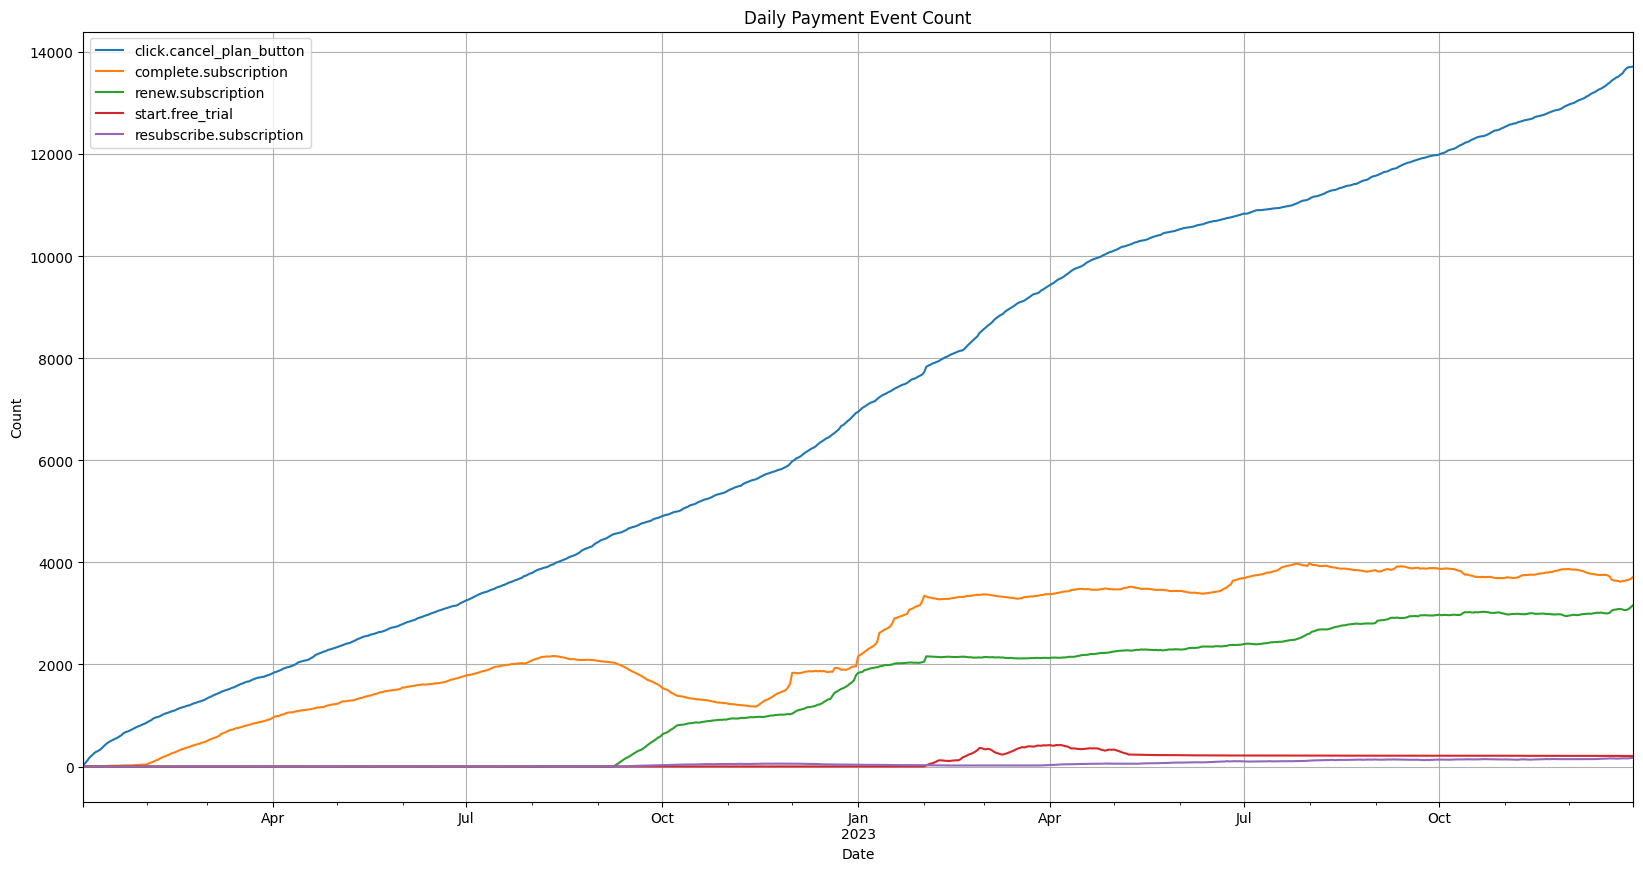

In [60]:
temp_df = pd.read_csv('payment_event_count.csv', index_col=0)
temp_df.to_csv('payment_event_count.csv', index=True)

temp_df = df.copy()
temp_df = temp_df.drop('error', axis=1)

plot = temp_df.plot(figsize=(20, 10), title='Daily Payment Event Count', xlabel='Date', ylabel='Count', grid=True)

In [61]:
pay_duration = groupby_user_agg_muli_column(payment_df, get_pay_duration, ['plan.price'])
display(pay_duration)
non_pay_duration = groupby_user_agg_muli_column(payment_df, get_non_pay_duration, ['plan.price'])
display(non_pay_duration)


user_id
1        281 days 09:19:33.562000
2        267 days 12:14:33.623000
6         32 days 22:45:43.389000
21         3 days 09:37:39.057000
33        43 days 23:19:04.203000
                   ...           
179738    68 days 00:28:21.579000
179741     0 days 00:50:47.569000
179744   120 days 00:53:56.907000
179745   252 days 06:35:52.528000
179751   102 days 03:59:46.901000
Name: total, Length: 21176, dtype: timedelta64[ns]

user_id
1                  [0 days 00:00:00, 2, 0]
2                 [0 days 00:00:00, 12, 0]
6                  [0 days 00:00:00, 2, 0]
21                 [0 days 00:00:00, 0, 0]
33                 [0 days 00:00:00, 5, 0]
                        ...               
179738             [0 days 00:00:00, 2, 0]
179741            [0 days 00:00:00, 12, 0]
179744             [0 days 00:00:00, 2, 0]
179745             [0 days 00:00:00, 0, 0]
179751    [69 days 11:22:46.326000, 10, 2]
Name: total, Length: 21176, dtype: object

In [62]:
# set df
non_pay_duration = non_pay_duration.apply(pd.Series)
non_pay_duration.columns = ['non_pay_duration', 'plan.price', 'before_plan.price']
non_pay_duration['plan.price'] = non_pay_duration['plan.price'].astype(int)
non_pay_duration['before_plan.price'] = non_pay_duration['before_plan.price'].astype(int)

display(non_pay_duration)

# filtering non_pay_duration 
result = non_pay_duration.loc[non_pay_duration['non_pay_duration'] > pd.Timedelta(0)]
display(result[result['before_plan.price'] == 0])

# result decoding
result['before_plan.price'] = encoder_dict['plan.price'].inverse_transform(result['before_plan.price'])
result['plan.price'] = encoder_dict['plan.price'].inverse_transform(result['plan.price'])

# sorting display
result = result[['plan.price', 'before_plan.price']].value_counts().sort_index()
result[result > 1]

,non_pay_duration,plan.price,before_plan.price
user_id,,,
1,0 days 00:00:00,2,0
2,0 days 00:00:00,12,0
6,0 days 00:00:00,2,0
21,0 days 00:00:00,0,0
33,0 days 00:00:00,5,0
...,...,...,...
179738,0 days 00:00:00,2,0
179741,0 days 00:00:00,12,0
179744,0 days 00:00:00,2,0


,non_pay_duration,plan.price,before_plan.price
user_id,,,
1025,365 days 00:00:51.985000,9,0
1202,346 days 05:18:23.053000,5,0
2866,244 days 19:06:43.129000,5,0
3754,33 days 11:35:13.578000,2,0
3796,390 days 16:39:56.957000,10,0
...,...,...,...
176326,366 days 14:29:29.559000,6,0
176730,11 days 21:47:04.876000,8,0
177013,528 days 04:14:22.935000,2,0


plan.price  before_plan.price
15920       15920                980
            42960                 13
            79200                  6
            131600                26
            NaN                   59
42960       15920                  4
            42960                 59
            131600                 2
            NaN                   11
79200       15920                 56
            42960                 27
            79200                  8
            131600                 9
            NaN                   71
83200       15920                 13
            42960                  2
            83200                  3
            131600                 2
            NaN                   31
87200       15920                  5
            42960                  5
            131600                 3
            NaN                   11
91200       15920                  2
            83200                  2
            91200                  2
        

In [63]:
price_list = [ int(x) for x in list(encoder_dict['plan.price'].classes_)[1:-1] ]
price_list = { x : 0 for x in price_list }

price_list[14328] = 1
price_list[15920] = 1
price_list[19920] = 1
price_list[42960] = 3
price_list[79200] = 6
price_list[83200] = 6
price_list[87200] = 6
price_list[91200] = 12
price_list[95200] = 12
price_list[95520] = 12
price_list[118440] = 12
price_list[131600] = 12

price_list

{14328: 1,
 15920: 1,
 19920: 1,
 42960: 3,
 79200: 6,
 83200: 6,
 87200: 6,
 91200: 12,
 95200: 12,
 95520: 12,
 118440: 12,
 131600: 12}

,non_pay_duration,plan.price,before_plan.price
user_id,,,
1,0 days 00:00:00,2,0
2,0 days 00:00:00,12,0
6,0 days 00:00:00,2,0
21,0 days 00:00:00,0,0
33,0 days 00:00:00,5,0
...,...,...,...
179738,0 days 00:00:00,2,0
179741,0 days 00:00:00,12,0
179744,0 days 00:00:00,2,0


user_id
1               0.000
2               0.000
6               0.000
21              0.000
33              0.000
             ...     
179738          0.000
179741          0.000
179744          0.000
179745          0.000
179751    6002566.326
Name: non_pay_duration, Length: 21176, dtype: float64

117.70221445221445


<Axes: ylabel='Density'>

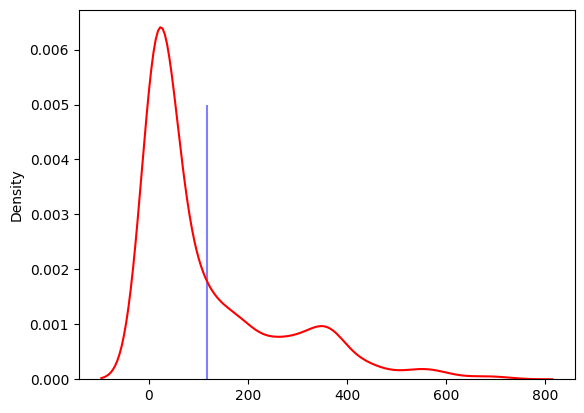

In [64]:
display(non_pay_duration)
display(non_pay_duration['non_pay_duration'].dt.total_seconds())
data = list(((non_pay_duration['non_pay_duration'].dt.total_seconds()) / (60 * 60 * 24)).round(0).astype(int))
data = [ x for x in data if x != 0 ]
mean = np.mean(data)

print(mean)
plt.vlines(mean, 0, 0.005, color='blue', alpha=0.5)
sns.kdeplot(data, color='red', label='non_pay_duration')

user_id
1        281 days 09:19:33.562000
2        267 days 12:14:33.623000
6         32 days 22:45:43.389000
21         3 days 09:37:39.057000
33        43 days 23:19:04.203000
                   ...           
179738    68 days 00:28:21.579000
179741     0 days 00:50:47.569000
179744   120 days 00:53:56.907000
179745   252 days 06:35:52.528000
179751   102 days 03:59:46.901000
Name: total, Length: 21176, dtype: timedelta64[ns]

array([2.10055452e+12, 1.99695228e+12, 2.45958629e+11, ...,
       8.96074869e+11, 1.88322214e+12, 7.62668948e+11])

200.5527295610677


<Axes: title={'center': 'pay_duration(Day)'}, ylabel='Density'>

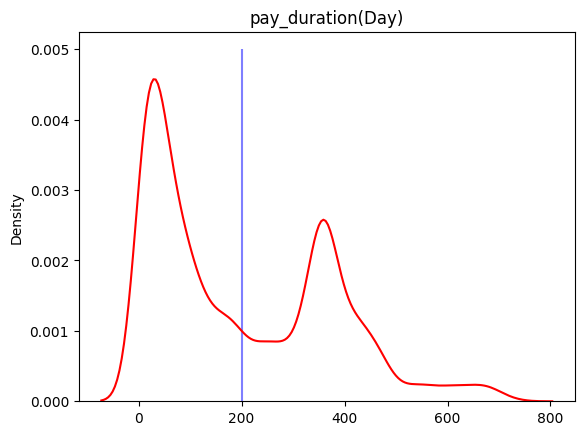

In [65]:
display(pay_duration)
display(pay_duration.values.astype(float) / 1000000000 * 60 * 60 * 24)
data = list((pay_duration.values.astype(float) / (1000000000 * 60 * 60 * 24)).round(0).astype(int))
data = [ x for x in data if x > 0 ]
mean = np.mean(data)

print(mean)
plt.vlines(mean, 0, 0.005, color='blue', alpha=0.5)
plt.title('pay_duration(Day)')
sns.kdeplot(data, color='red', label='pay_duration')

### 해적지표 살펴보기

#### **획득**

1. **정의** : 회원가입을 한 유저
2. **정의 조건** : user_id ≠ ‘nan’( 회원 )
3. 이유: 회원 가입일자를 알 수 없는 고객의 수가 너무 많아서 \
complete.signup 데이터에서 확인 가능한 user_id에 국한되지 않음 
4. 주의사항 : 전체 회원 중 일부분(20% 가량)은 데이터 기간 밖에서 회원 가입을 함, \
획득 비율이나 비용계산은 어려우나, 회원 가입한 수는 complete.signup 데이터에서 확인할 수 있다, \ 
즉 비율과 비용을 구하는 것이 아닌, 이전에 수민님께서 이야기 하신 Frequency로 접근을 해야함

<Axes: title={'center': 'Cumulative Sign Up Count'}, xlabel='Date', ylabel='Count'>

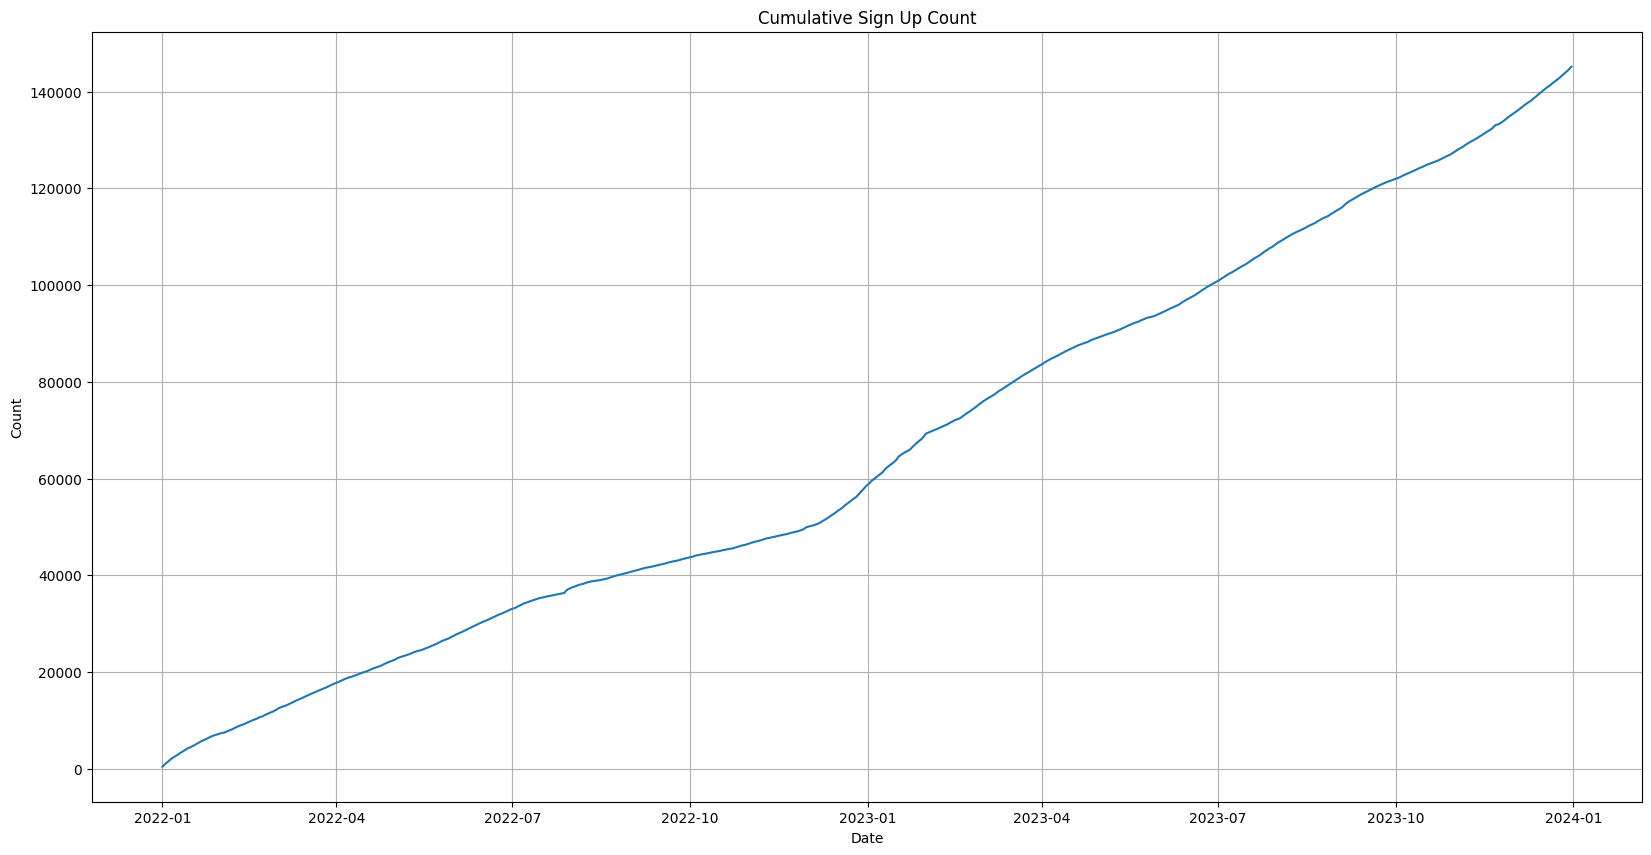

In [228]:
result = pd.concat([com_df_22[com_df_22['event_type'] == 3], com_df_23[com_df_23['event_type'] == 3]])
result = result\
    .groupby(result['client_event_time'].dt.date)['user_id']\
    .nunique().cumsum()

result.plot(figsize=(20, 10), title='Cumulative Sign Up Count', xlabel='Date', ylabel='Count', grid=True)

In [253]:
user_cumsum_22 = result[result.index < pd.to_datetime('2023-01-01').date()]
user_cumsum_22.index = pd.to_datetime(user_cumsum_22.index).strftime('%m-%d')
user_cumsum_23 = result[result.index > pd.to_datetime('2022-12-31').date()]
user_cumsum_23.index = pd.to_datetime(user_cumsum_23.index).strftime('%m-%d')

print(user_cumsum_22)
print(user_cumsum_23)

client_event_time
01-01      422
01-02      823
01-03     1184
01-04     1496
01-05     1854
         ...  
12-27    56632
12-28    57109
12-29    57506
12-30    57961
12-31    58387
Name: user_id, Length: 365, dtype: int64
client_event_time
01-01     58743
01-02     59119
01-03     59526
01-04     59851
01-05     60171
          ...  
12-27    143617
12-28    143973
12-29    144306
12-30    144705
12-31    145133
Name: user_id, Length: 365, dtype: int64


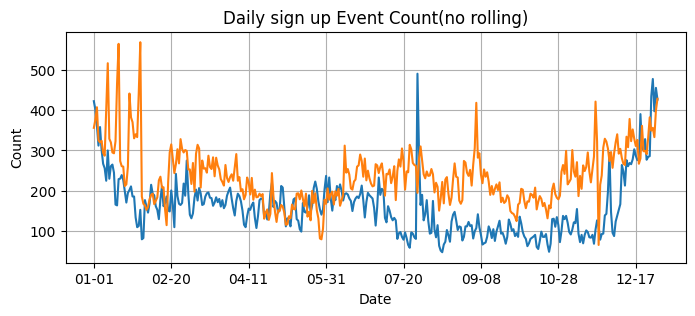

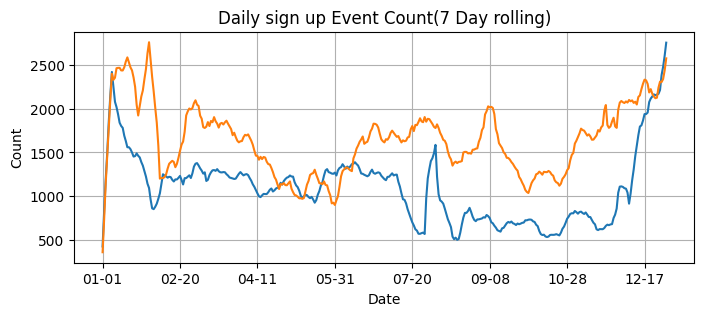

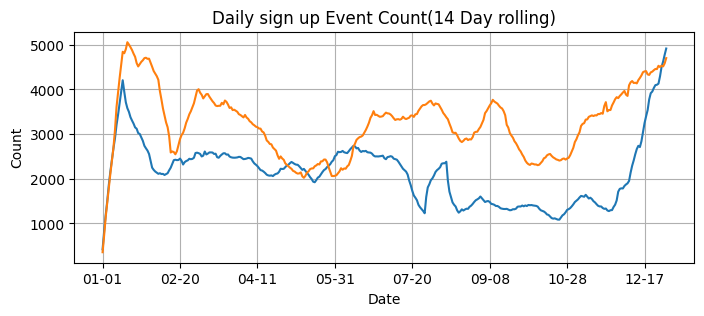

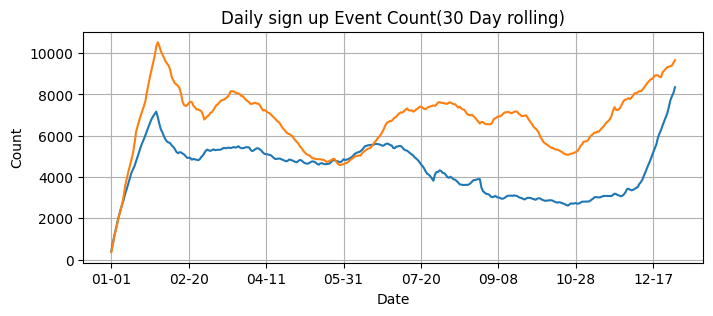

In [176]:
result_22 = com_df_22[com_df_22['event_type'] == 3]\
    .groupby(com_df_22['client_event_time'].dt.strftime("%m-%d"))['user_id']\
    .nunique()
result_23 = com_df_23[com_df_23['event_type'] == 3]\
    .groupby(com_df_23['client_event_time'].dt.strftime("%m-%d"))['user_id']\
    .nunique()
    
result_22\
    .plot(figsize=(8, 3), title='Daily sign up Event Count(no rolling)', xlabel='Date', ylabel='Count', grid=True)
result_23\
    .plot(figsize=(8, 3), xlabel='Date', grid=True)
plt.show()

for rolling_offset in [7, 14, 30]:    
    result_22\
        .rolling(rolling_offset, min_periods=1).sum()\
        .plot(figsize=(8, 3), title=f'Daily sign up Event Count({rolling_offset} Day rolling)', xlabel='Date', ylabel='Count', grid=True)
    result_23\
        .rolling(rolling_offset, min_periods=1).sum()\
        .plot(figsize=(8, 3), xlabel='Date', grid=True)

    plt.show()

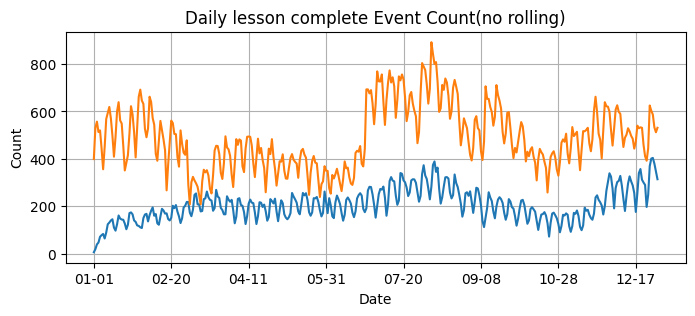

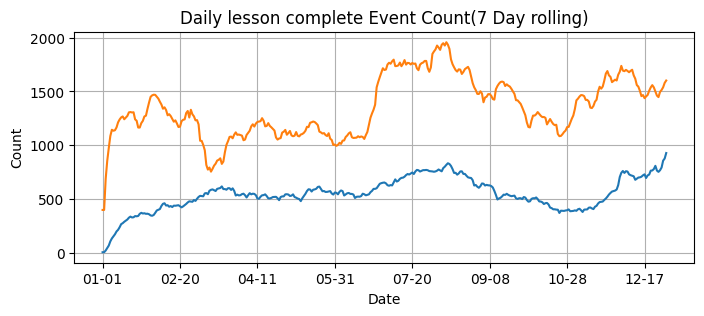

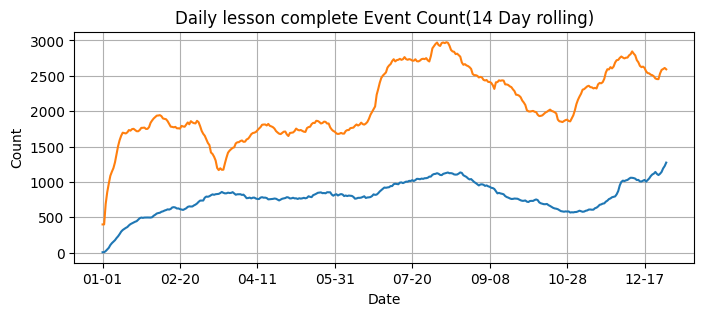

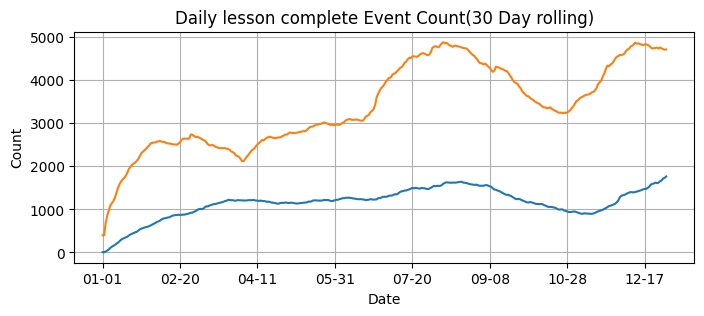

In [226]:
user_id_in_df = user_indexs[user_indexs['event_type'] == 3]['user_id'].unique()

# set the target df
dfs = [
    com_df_22.loc[(com_df_22['event_type'] == 14) & com_df_22['user_id'].isin(user_id_in_df), ['user_id', 'client_event_time']],
    com_df_23.loc[(com_df_23['event_type'] == 14) & com_df_23['user_id'].isin(user_id_in_df), ['user_id', 'client_event_time']]
]

# set time list
timelists = [
    pd.date_range('2022-01-01', '2022-12-31', freq='D').floor("D"),
    pd.date_range('2023-01-01', '2023-12-31', freq='D').floor("D")
]

# set result, temp
results = [[], []]
temps = [[], []]

# get results
for i in range(2):
    results[i] = dfs[i].groupby(dfs[i]['client_event_time'].dt.strftime("%m-%d"))['user_id'].nunique()
    temps[i] = pd.DataFrame(["01-01", results[i].iloc[0]])
    temps[i] = temps[i].T
    temps[i].columns = ['date', 'user_id_unique']

# display
results[0].plot(figsize=(8, 3), title='Daily lesson complete Event Count(no rolling)', xlabel='Date', ylabel='Count', grid=True)
results[1].plot(figsize=(8, 3), xlabel='Date', grid=True)
plt.show()

# set result_list
result_list = [[], []]

for i in range(2):
    result_list[i] = [ results[i].copy() ]
    
# rolling count
for rolling_offset in [7, 14, 30]:
    # reset rolling
    results = [
        pd.DataFrame(temps[0].copy(), columns=['date', 'user_id_unique']),
        pd.DataFrame(temps[1].copy(), columns=['date', 'user_id_unique'])
    ]
    
    for j in range(2):
        for i in range(1, 365):
            # set mindate
            if i <= rolling_offset - 1:
                min_data = timelists[j][0]
            else:
                min_data = timelists[j][i + 1 - rolling_offset]
            
            # get rolling result
            rolling_result = dfs[j]\
                .loc[((dfs[j]['client_event_time'] >= pd.Timestamp(min_data))\
                    & (dfs[j]['client_event_time'] <= pd.Timestamp(timelists[j][i]))), 'user_id']\
                        .nunique()

            # set temp result
            temp = pd.DataFrame([timelists[j][i].strftime("%m-%d"), rolling_result])
            temp = temp.T
            temp.columns = ['date', 'user_id_unique']
                
            # concat            
            results[j] = pd.concat([results[j], temp])

        # set index
        results[j].set_index('date', inplace=True)
        
        # append result_list
        result_list[j].append(results[j].copy())

    # display
    results[0]['user_id_unique'].plot(figsize=(8, 3), title=f'Daily lesson complete Event Count({rolling_offset} Day rolling)', xlabel='Date', ylabel='Count', grid=True)
    results[1]['user_id_unique'].plot(figsize=(8, 3), xlabel='Date', grid=True)
    plt.show()

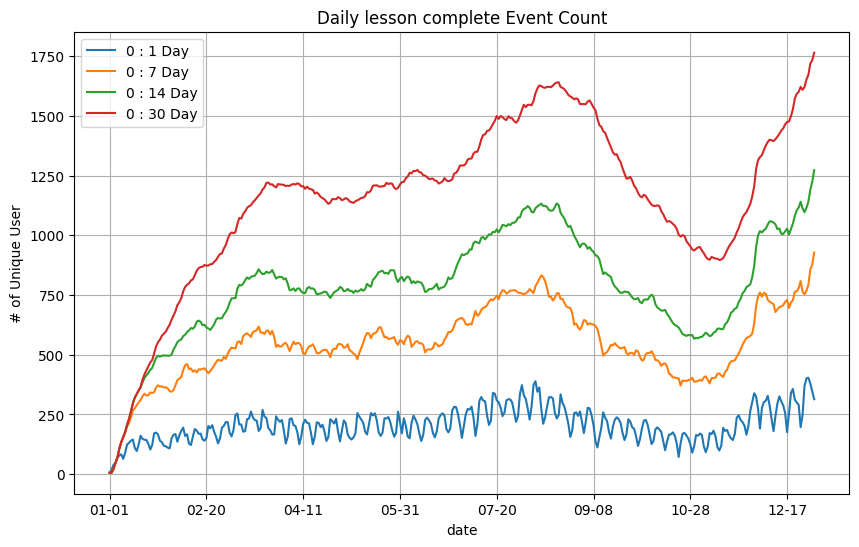

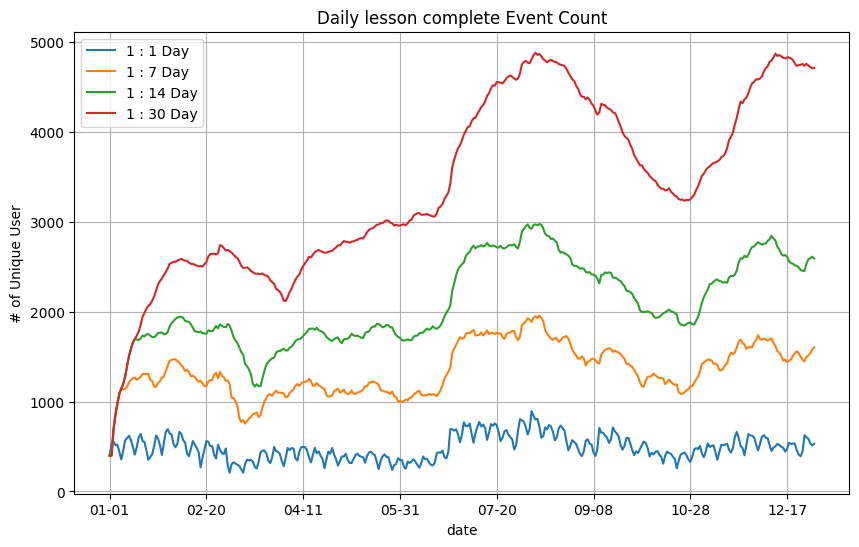

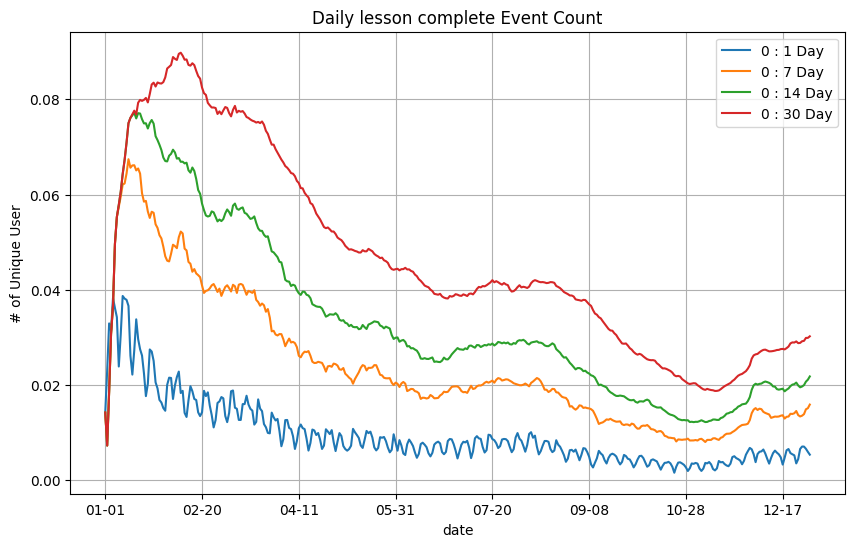

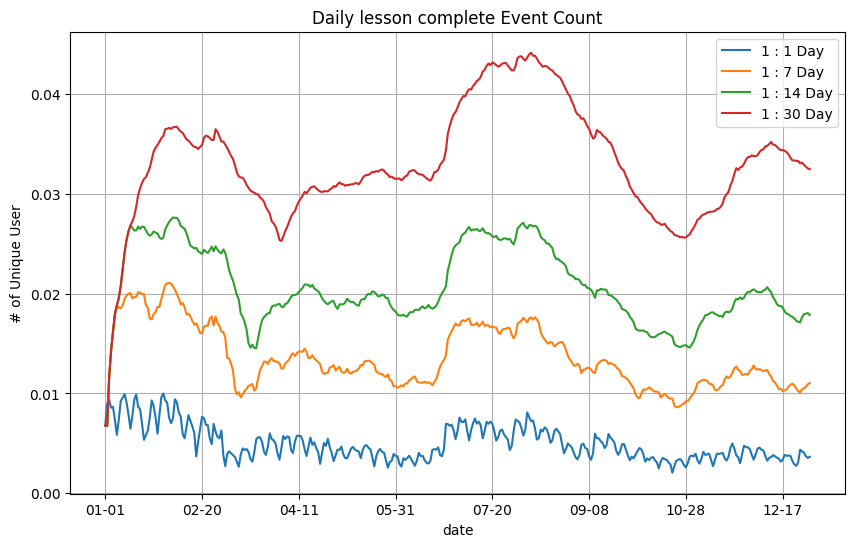

In [254]:
# display result_list
for i in range(2):
    result_list[i][0].plot(figsize=(10, 6), title=f'Daily lesson complete Event Count', xlabel='Date', ylabel='# of Unique User', grid=True, label = f'{i} : 1 Day')
    result_list[i][1]['user_id_unique'].plot(figsize=(10, 6), grid=True, label = f'{i} : 7 Day')
    result_list[i][2]['user_id_unique'].plot(figsize=(10, 6), grid=True, label = f'{i} : 14 Day')
    result_list[i][3]['user_id_unique'].plot(figsize=(10, 6), grid=True, label = f'{i} : 30 Day')
    
    plt.legend()
    plt.show()

user_cumsum_list = [user_cumsum_22, user_cumsum_23]
# display result_list
for i in range(2):
    (result_list[i][0] / user_cumsum_list[i]).plot(figsize=(10, 6), title=f'Daily lesson complete Event Count', xlabel='Date', ylabel='# of Unique User', grid=True, label = f'{i} : 1 Day')
    (result_list[i][1]['user_id_unique'] / user_cumsum_list[i]).plot(figsize=(10, 6), grid=True, label = f'{i} : 7 Day')
    (result_list[i][2]['user_id_unique'] / user_cumsum_list[i]).plot(figsize=(10, 6), grid=True, label = f'{i} : 14 Day')
    (result_list[i][3]['user_id_unique'] / user_cumsum_list[i]).plot(figsize=(10, 6), grid=True, label = f'{i} : 30 Day')
    
    plt.legend()
    plt.show()
